In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')
bg = Population(N=1000, tau=1e-2, phi=phi, name='bg')
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) 

S, P = 1, 3
sequences_ctx = [GaussianSequence(P,ctx.size, seed=5) for i in range(S)]
patterns_ctx = np.stack([s.inputs for s in sequences_ctx])
sequences_bg = [GaussianSequence(P,ctx.size, seed=27) for i in range(S)]
patterns_bg = np.stack([s.inputs for s in sequences_bg])

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.05)
synapse_cc = LinearSynapse(J_cc.K, A=5)
J_cc.store_attractors(patterns_ctx[0], patterns_ctx[0], synapse_cc.h_EE, 
                      plasticity.f, plasticity.g)
J_bb = SparseConnectivity(source=bg, target=bg, p=0.05)
synapse_bb = LinearSynapse(J_bb.K, A=5)
J_bb.store_attractors(patterns_bg[0], patterns_bg[0], synapse_bb.h_EE, 
                      plasticity.f, plasticity.g)
J_cb  = SparseConnectivity(source=bg, target=ctx, p=0.05)
synapse_cb = LinearSynapse(J_cb.K, A=1)
J_cb.store_attractors(patterns_bg[0], patterns_ctx[0], synapse_cb.h_EE, 
                      plasticity.f, plasticity.g)

J_bc = SparseConnectivity(source=ctx, target=bg, p=0.05)
synapse_bc = LinearSynapse(J_bc.K, A=0)
J_bc.store_sequences(patterns_ctx, patterns_bg, synapse_bc.h_EE, plasticity.f, plasticity.g)
net_ctx = RateNetwork(ctx, c_EE=J_cc, c_IE=J_bc, formulation=4)
net_bg = RateNetwork(bg, c_II=J_bb, c_EI=J_cb, formulation=4)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 20500.22it/s]
INFO:connectivity:Building connections from bg to bg
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 22243.04it/s]
INFO:connectivity:Building connections from bg to ctx
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 23715.26it/s]
INFO:connectivity:Building connections from ctx to bg
INFO:connectivity:Storing sequences
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.09it/s]
INFO:connectivity:Applying synaptic transfer function
INFO:connectivity:Building sparse matrix


In [4]:
# init_input_ctx = np.random.RandomState().normal(0,1,size=patterns_ctx[0][0].shape)
# init_input_bg = np.random.RandomState().normal(0,1,size=patterns_bg[0][0].shape)
init_input_ctx = patterns_ctx[0][0]
init_input_bg = patterns_bg[0][0]
T=10
mouse = ReachingTask(3, alpha=0.5)
net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
                          phi(patterns_ctx[0]), phi(patterns_bg[0]), plasticity)

INFO:network:Integrating network dynamics
  0%|                                        | 5/9999 [00:02<1:06:41,  2.50it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  0%|                                         | 11/9999 [00:02<24:32,  6.78it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  0%|                                         | 17/9999 [00:02<14:08, 11.76it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  0%|                                         | 23/9999 [00:03<10:11, 16.31it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  0%|                                         | 29/9999 [00:03<08:23, 19.80it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  0%|▏                                        | 35/9999 [00:03<07:31, 22.08it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  0%|▏                                        | 38/9999 [00:03<07:25, 22.37it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  0%|▏                                        | 44/9999 [00:04<07:11, 23.07it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▏                                        | 50/9999 [00:04<06:56, 23.90it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▏                                        | 56/9999 [00:04<06:47, 24.41it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 62/9999 [00:04<07:03, 23.46it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 68/9999 [00:05<07:11, 23.02it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 71/9999 [00:05<07:07, 23.24it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 77/9999 [00:05<07:09, 23.09it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 83/9999 [00:05<07:12, 22.93it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 86/9999 [00:05<07:07, 23.17it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▍                                        | 92/9999 [00:06<07:07, 23.17it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▍                                        | 98/9999 [00:06<07:09, 23.04it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▍                                       | 101/9999 [00:06<07:06, 23.23it/s]

0 -1
0 0
0 0
0 0
0 0


  1%|▍                                       | 107/9999 [00:06<07:05, 23.23it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▍                                       | 113/9999 [00:07<07:09, 23.01it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▍                                       | 116/9999 [00:07<07:02, 23.36it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▍                                       | 122/9999 [00:07<07:04, 23.26it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▌                                       | 128/9999 [00:07<07:04, 23.24it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▌                                       | 131/9999 [00:07<06:59, 23.50it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▌                                       | 137/9999 [00:08<07:01, 23.42it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▌                                       | 143/9999 [00:08<07:03, 23.26it/s]

0 0
0 0
0 0
0 0
0 0


  1%|▌                                       | 146/9999 [00:08<07:01, 23.36it/s]

0 0
0 0
0 0
0 0
0 0


  2%|▌                                       | 152/9999 [00:08<07:16, 22.57it/s]

0 0
0 0
0 0
0 0
0 0


  2%|▋                                       | 158/9999 [00:08<06:57, 23.57it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▋                                       | 164/9999 [00:09<06:44, 24.30it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▋                                       | 170/9999 [00:09<06:35, 24.84it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▋                                       | 176/9999 [00:09<06:31, 25.09it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▋                                       | 182/9999 [00:09<06:32, 24.99it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▊                                       | 188/9999 [00:10<06:35, 24.81it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▊                                       | 194/9999 [00:10<06:33, 24.89it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▊                                       | 200/9999 [00:10<06:31, 25.06it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▊                                       | 206/9999 [00:10<06:28, 25.21it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▊                                       | 212/9999 [00:11<06:38, 24.56it/s]

0 0
0 0
0 0
0 0
0 0


  2%|▊                                       | 218/9999 [00:11<06:37, 24.60it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▉                                       | 224/9999 [00:11<06:35, 24.71it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▉                                       | 230/9999 [00:11<06:32, 24.87it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▉                                       | 236/9999 [00:12<06:29, 25.04it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▉                                       | 242/9999 [00:12<06:34, 24.70it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  2%|▉                                       | 248/9999 [00:12<06:35, 24.63it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█                                       | 254/9999 [00:12<06:34, 24.73it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█                                       | 260/9999 [00:13<06:32, 24.79it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█                                       | 266/9999 [00:13<06:33, 24.74it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█                                       | 272/9999 [00:13<06:33, 24.69it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█                                       | 278/9999 [00:13<06:36, 24.53it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█▏                                      | 284/9999 [00:14<06:36, 24.52it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█▏                                      | 290/9999 [00:14<06:32, 24.72it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█▏                                      | 296/9999 [00:14<06:34, 24.59it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█▏                                      | 302/9999 [00:14<06:35, 24.51it/s]

0 0
0 0
0 0
0 0
0 0
0 0


  3%|█▏                                      | 308/9999 [00:15<06:37, 24.39it/s]

0 0
-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▏                                      | 311/9999 [00:15<06:40, 24.19it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▎                                      | 317/9999 [00:15<06:38, 24.29it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▎                                      | 323/9999 [00:15<06:39, 24.19it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▎                                      | 329/9999 [00:15<06:40, 24.13it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▎                                      | 335/9999 [00:16<06:35, 24.44it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▎                                      | 341/9999 [00:16<06:32, 24.59it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  3%|█▍                                      | 347/9999 [00:16<06:34, 24.47it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▍                                      | 353/9999 [00:16<06:37, 24.26it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▍                                      | 359/9999 [00:17<06:36, 24.30it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▍                                      | 365/9999 [00:17<06:33, 24.48it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▍                                      | 371/9999 [00:17<06:32, 24.55it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▌                                      | 377/9999 [00:17<06:34, 24.42it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▌                                      | 383/9999 [00:18<06:34, 24.41it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▌                                      | 389/9999 [00:18<06:37, 24.17it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▌                                      | 395/9999 [00:18<06:33, 24.43it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▌                                      | 401/9999 [00:18<06:32, 24.48it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


  4%|█▋                                      | 407/9999 [00:19<06:32, 24.41it/s]

-1 0
-1 0
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▋                                      | 413/9999 [00:19<06:35, 24.27it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▋                                      | 419/9999 [00:19<06:34, 24.26it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▋                                      | 425/9999 [00:19<06:32, 24.37it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▋                                      | 428/9999 [00:19<06:36, 24.14it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▋                                      | 434/9999 [00:20<06:36, 24.13it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▊                                      | 440/9999 [00:20<06:33, 24.30it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  4%|█▊                                      | 446/9999 [00:20<06:31, 24.41it/s]

-1 -1
-1 -1
-1 -1
2 -1
-1 -1


  5%|█▊                                      | 452/9999 [00:20<06:32, 24.31it/s]

-1 -1
-1 -1
aim-->lick
-1 -1
-1 -1
2 -1
2 -1


  5%|█▊                                      | 458/9999 [00:21<06:35, 24.14it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|█▊                                      | 464/9999 [00:21<06:32, 24.29it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|█▉                                      | 470/9999 [00:21<06:28, 24.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|█▉                                      | 476/9999 [00:21<06:25, 24.72it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|█▉                                      | 482/9999 [00:22<06:29, 24.46it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|█▉                                      | 488/9999 [00:22<06:30, 24.35it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|█▉                                      | 494/9999 [00:22<06:28, 24.49it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██                                      | 500/9999 [00:22<06:26, 24.60it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██                                      | 506/9999 [00:23<06:25, 24.62it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██                                      | 512/9999 [00:23<06:29, 24.35it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██                                      | 518/9999 [00:23<06:29, 24.33it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██                                      | 524/9999 [00:23<06:28, 24.37it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██                                      | 530/9999 [00:24<06:25, 24.57it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██▏                                     | 536/9999 [00:24<06:23, 24.70it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██▏                                     | 542/9999 [00:24<06:23, 24.63it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  5%|██▏                                     | 548/9999 [00:24<06:27, 24.39it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


  6%|██▏                                     | 554/9999 [00:25<06:25, 24.52it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▏                                     | 560/9999 [00:25<06:23, 24.63it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▎                                     | 566/9999 [00:25<06:21, 24.75it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▎                                     | 572/9999 [00:25<06:21, 24.70it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▎                                     | 578/9999 [00:26<06:22, 24.63it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▎                                     | 584/9999 [00:26<06:23, 24.58it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▎                                     | 590/9999 [00:26<06:19, 24.81it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▍                                     | 596/9999 [00:26<06:19, 24.78it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▍                                     | 602/9999 [00:27<06:21, 24.61it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▍                                     | 608/9999 [00:27<06:22, 24.55it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▍                                     | 614/9999 [00:27<06:21, 24.62it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▍                                     | 620/9999 [00:27<06:17, 24.81it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▌                                     | 626/9999 [00:28<06:15, 24.96it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▌                                     | 632/9999 [00:28<06:20, 24.61it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▌                                     | 638/9999 [00:28<06:22, 24.48it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  6%|██▌                                     | 644/9999 [00:28<06:21, 24.51it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▌                                     | 650/9999 [00:29<06:18, 24.73it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▌                                     | 656/9999 [00:29<06:16, 24.83it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▋                                     | 662/9999 [00:29<06:18, 24.67it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▋                                     | 668/9999 [00:29<06:19, 24.56it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▋                                     | 674/9999 [00:29<06:19, 24.57it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▋                                     | 680/9999 [00:30<06:16, 24.75it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▋                                     | 686/9999 [00:30<06:14, 24.89it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▊                                     | 692/9999 [00:30<06:16, 24.72it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▊                                     | 698/9999 [00:30<06:18, 24.56it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▊                                     | 704/9999 [00:31<06:17, 24.62it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▊                                     | 710/9999 [00:31<06:14, 24.79it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▊                                     | 716/9999 [00:31<06:13, 24.87it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▉                                     | 722/9999 [00:31<06:16, 24.62it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▉                                     | 728/9999 [00:32<06:17, 24.56it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▉                                     | 734/9999 [00:32<06:16, 24.59it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▉                                     | 740/9999 [00:32<06:12, 24.83it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  7%|██▉                                     | 746/9999 [00:32<06:13, 24.80it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  8%|███                                     | 752/9999 [00:33<06:14, 24.66it/s]

2 2
2 2
2 2
2 2
2 2
2 2


  8%|███                                     | 758/9999 [00:33<06:19, 24.38it/s]

2 2
2 2
2 2
-1 2
-1 2
-1 2


  8%|███                                     | 764/9999 [00:33<06:19, 24.35it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███                                     | 770/9999 [00:33<06:18, 24.37it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███                                     | 776/9999 [00:34<06:16, 24.52it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▏                                    | 782/9999 [00:34<06:17, 24.41it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▏                                    | 788/9999 [00:34<06:18, 24.34it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▏                                    | 794/9999 [00:34<06:19, 24.27it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▏                                    | 797/9999 [00:34<06:18, 24.34it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▏                                    | 803/9999 [00:35<06:20, 24.19it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▏                                    | 809/9999 [00:35<06:17, 24.32it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▎                                    | 815/9999 [00:35<06:14, 24.52it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▎                                    | 821/9999 [00:35<06:12, 24.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▎                                    | 827/9999 [00:36<06:14, 24.46it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▎                                    | 833/9999 [00:36<06:17, 24.28it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▎                                    | 839/9999 [00:36<06:17, 24.29it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  8%|███▍                                    | 845/9999 [00:36<06:13, 24.51it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


  9%|███▍                                    | 851/9999 [00:37<06:11, 24.61it/s]

-1 2
-1 2
-1 2
-1 2
-1 -1
-1 -1


  9%|███▍                                    | 857/9999 [00:37<06:14, 24.41it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▍                                    | 863/9999 [00:37<06:33, 23.23it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▍                                    | 869/9999 [00:37<06:41, 22.73it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▌                                    | 875/9999 [00:38<06:28, 23.49it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▌                                    | 878/9999 [00:38<06:31, 23.32it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▌                                    | 884/9999 [00:38<06:26, 23.59it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▌                                    | 887/9999 [00:38<06:42, 22.63it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▌                                    | 893/9999 [00:39<06:43, 22.58it/s]

-1 -1
0 -1
0 -1
-1 -1
0 -1


  9%|███▌                                    | 899/9999 [00:39<06:35, 22.99it/s]

-1 -1
0 -1
0 -1
0 -1
0 -1


  9%|███▌                                    | 902/9999 [00:39<06:31, 23.23it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


  9%|███▋                                    | 908/9999 [00:39<06:30, 23.30it/s]

0 -1
0 -1
0 -1
-1 -1
0 -1


  9%|███▋                                    | 914/9999 [00:39<06:30, 23.28it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▋                                    | 917/9999 [00:40<06:27, 23.47it/s]

-1 -1
-1 -1
-1 -1
-1 -1
0 -1


  9%|███▋                                    | 923/9999 [00:40<06:28, 23.38it/s]

0 -1
0 -1
lick-->aim
0 -1
0 -1
0 -1


  9%|███▋                                    | 929/9999 [00:40<06:25, 23.50it/s]

-1 -1
-1 -1
-1 -1
0 -1
0 -1


  9%|███▋                                    | 932/9999 [00:40<06:24, 23.56it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▊                                    | 938/9999 [00:40<06:28, 23.30it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▊                                    | 944/9999 [00:41<06:24, 23.53it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


  9%|███▊                                    | 947/9999 [00:41<06:22, 23.66it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▊                                    | 953/9999 [00:41<06:28, 23.27it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▊                                    | 959/9999 [00:41<06:26, 23.39it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▊                                    | 962/9999 [00:41<06:23, 23.57it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▊                                    | 968/9999 [00:42<06:23, 23.56it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▉                                    | 974/9999 [00:42<06:21, 23.65it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▉                                    | 977/9999 [00:42<06:20, 23.70it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▉                                    | 983/9999 [00:42<06:21, 23.63it/s]

-1 -1
-1 -1
-1 -1
-1 -1
2 -1


 10%|███▉                                    | 989/9999 [00:43<06:19, 23.75it/s]

2 -1
2 -1
-1 -1
-1 -1
-1 -1


 10%|███▉                                    | 995/9999 [00:43<06:14, 24.04it/s]

-1 -1
-1 -1
2 -1
2 -1
2 -1


 10%|███▉                                    | 998/9999 [00:43<06:17, 23.81it/s]

2 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▉                                   | 1004/9999 [00:43<06:19, 23.72it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 10%|███▉                                   | 1010/9999 [00:43<06:14, 24.01it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 10%|███▉                                   | 1013/9999 [00:44<06:18, 23.76it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 10%|███▉                                   | 1019/9999 [00:44<06:18, 23.71it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 10%|███▉                                   | 1022/9999 [00:44<06:14, 23.95it/s]

2 -1
2 0
2 0
2 0
2 0


 10%|████                                   | 1028/9999 [00:44<06:17, 23.76it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 10%|████                                   | 1034/9999 [00:44<06:15, 23.88it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 10%|████                                   | 1040/9999 [00:45<06:11, 24.10it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 10%|████                                   | 1046/9999 [00:45<06:09, 24.22it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 11%|████                                   | 1052/9999 [00:45<06:12, 24.05it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 11%|████▏                                  | 1058/9999 [00:45<06:14, 23.87it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▏                                  | 1064/9999 [00:46<06:14, 23.88it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▏                                  | 1067/9999 [00:46<06:13, 23.91it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▏                                  | 1073/9999 [00:46<06:14, 23.80it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 11%|████▏                                  | 1079/9999 [00:46<06:13, 23.87it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▏                                  | 1085/9999 [00:47<06:10, 24.07it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▎                                  | 1091/9999 [00:47<06:08, 24.20it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▎                                  | 1094/9999 [00:47<06:11, 23.94it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 11%|████▎                                  | 1100/9999 [00:47<06:09, 24.05it/s]

2 0
2 0
2 0
2 0
2 0
aim-->lick


 11%|████▎                                  | 1106/9999 [00:47<06:07, 24.17it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▎                                  | 1112/9999 [00:48<06:10, 23.99it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▎                                  | 1115/9999 [00:48<06:09, 24.02it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▎                                  | 1121/9999 [00:48<06:08, 24.11it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▍                                  | 1124/9999 [00:48<06:12, 23.81it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▍                                  | 1130/9999 [00:48<06:09, 23.97it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▍                                  | 1136/9999 [00:49<06:08, 24.06it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▍                                  | 1139/9999 [00:49<06:11, 23.83it/s]

2 0
2 0
2 0
2 0
2 0


 11%|████▍                                  | 1145/9999 [00:49<06:08, 24.01it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 12%|████▍                                  | 1151/9999 [00:49<06:07, 24.08it/s]

2 0
2 0
2 0
2 0
2 0
2 0


 12%|████▌                                  | 1157/9999 [00:50<06:09, 23.96it/s]

2 0
2 0
2 0
2 0
2 0


 12%|████▌                                  | 1163/9999 [00:50<06:11, 23.80it/s]

2 0
2 -1
2 -1
2 -1
2 -1


 12%|████▌                                  | 1166/9999 [00:50<06:07, 24.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▌                                  | 1172/9999 [00:50<06:09, 23.90it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▌                                  | 1178/9999 [00:50<06:10, 23.81it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▌                                  | 1184/9999 [00:51<06:10, 23.81it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▋                                  | 1190/9999 [00:51<06:06, 24.05it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▋                                  | 1193/9999 [00:51<06:09, 23.82it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▋                                  | 1199/9999 [00:51<06:08, 23.90it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 12%|████▋                                  | 1205/9999 [00:52<06:04, 24.14it/s]

2 -1
2 2
2 2
2 2
2 2


 12%|████▋                                  | 1208/9999 [00:52<06:07, 23.90it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 12%|████▋                                  | 1214/9999 [00:52<06:06, 23.96it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 12%|████▊                                  | 1220/9999 [00:52<06:03, 24.14it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 12%|████▊                                  | 1226/9999 [00:52<06:04, 24.07it/s]

2 2
2 2
2 2
2 2
2 2


 12%|████▊                                  | 1232/9999 [00:53<06:04, 24.03it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 12%|████▊                                  | 1238/9999 [00:53<06:05, 23.96it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 12%|████▊                                  | 1244/9999 [00:53<06:05, 23.95it/s]

2 2
2 2
2 2
2 2
2 2


 13%|████▉                                  | 1250/9999 [00:53<06:00, 24.26it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 13%|████▉                                  | 1256/9999 [00:54<05:57, 24.46it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 13%|████▉                                  | 1262/9999 [00:54<06:01, 24.19it/s]

2 2
2 2
2 2
2 2
2 2


 13%|████▉                                  | 1265/9999 [00:54<06:00, 24.21it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 13%|████▉                                  | 1271/9999 [00:54<05:59, 24.27it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 13%|████▉                                  | 1277/9999 [00:55<06:03, 24.01it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 13%|█████                                  | 1283/9999 [00:55<06:05, 23.82it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 13%|█████                                  | 1289/9999 [00:55<06:05, 23.86it/s]

2 2
2 2
2 2
2 2
2 2


 13%|█████                                  | 1295/9999 [00:55<06:00, 24.15it/s]

2 2
2 2
2 2
2 2
2 2


 13%|█████                                  | 1301/9999 [00:56<05:59, 24.19it/s]

2 2
2 2
2 2
2 2
2 2


 13%|█████                                  | 1304/9999 [00:56<06:02, 23.96it/s]

2 2
2 2
2 2
2 2
2 2


 13%|█████                                  | 1310/9999 [00:56<06:02, 24.00it/s]

2 2
2 2
2 2
-1 2
-1 2


 13%|█████                                  | 1313/9999 [00:56<06:04, 23.83it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▏                                 | 1319/9999 [00:56<06:07, 23.63it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▏                                 | 1325/9999 [00:57<06:03, 23.89it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▏                                 | 1328/9999 [00:57<06:07, 23.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▏                                 | 1334/9999 [00:57<06:05, 23.71it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▏                                 | 1340/9999 [00:57<06:02, 23.88it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▏                                 | 1346/9999 [00:57<05:59, 24.09it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 13%|█████▎                                 | 1349/9999 [00:58<06:04, 23.75it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▎                                 | 1355/9999 [00:58<06:01, 23.90it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▎                                 | 1361/9999 [00:58<06:05, 23.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▎                                 | 1364/9999 [00:58<06:08, 23.43it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▎                                 | 1370/9999 [00:59<06:03, 23.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▎                                 | 1376/9999 [00:59<06:07, 23.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▍                                 | 1379/9999 [00:59<06:11, 23.19it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▍                                 | 1385/9999 [00:59<06:07, 23.45it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▍                                 | 1391/9999 [00:59<06:20, 22.61it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▍                                 | 1394/9999 [01:00<06:23, 22.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▍                                 | 1400/9999 [01:00<06:12, 23.10it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▍                                 | 1406/9999 [01:00<06:06, 23.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1412/9999 [01:00<05:59, 23.87it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1418/9999 [01:01<05:58, 23.91it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1424/9999 [01:01<05:54, 24.20it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1427/9999 [01:01<06:10, 23.14it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1433/9999 [01:01<06:23, 22.32it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1439/9999 [01:02<06:19, 22.53it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▌                                 | 1442/9999 [01:02<06:20, 22.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 14%|█████▋                                 | 1448/9999 [01:02<06:24, 22.24it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 15%|█████▋                                 | 1454/9999 [01:02<06:20, 22.48it/s]

-1 2
-1 2
-1 2
-1 2
2 2


 15%|█████▋                                 | 1457/9999 [01:02<06:17, 22.61it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▋                                 | 1463/9999 [01:03<06:23, 22.27it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▋                                 | 1469/9999 [01:03<06:18, 22.56it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▋                                 | 1472/9999 [01:03<06:16, 22.64it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▊                                 | 1478/9999 [01:03<06:14, 22.73it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▊                                 | 1484/9999 [01:03<06:11, 22.91it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▊                                 | 1487/9999 [01:04<06:10, 23.00it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▊                                 | 1493/9999 [01:04<06:08, 23.09it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▊                                 | 1499/9999 [01:04<06:06, 23.17it/s]

2 2
2 2
2 2
2 2
2 2


 15%|█████▊                                 | 1502/9999 [01:04<06:06, 23.21it/s]

2 2
2 2
2 2
2 2
2 -1


 15%|█████▉                                 | 1508/9999 [01:05<06:07, 23.11it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 15%|█████▉                                 | 1514/9999 [01:05<06:08, 23.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 15%|█████▉                                 | 1517/9999 [01:05<06:06, 23.15it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 15%|█████▉                                 | 1523/9999 [01:05<06:07, 23.05it/s]

2 -1
2 -1
2 -1
2 -1
lick-->lick
2 -1


 15%|█████▉                                 | 1529/9999 [01:05<06:07, 23.06it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 15%|█████▉                                 | 1532/9999 [01:06<06:05, 23.19it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 15%|█████▉                                 | 1538/9999 [01:06<05:59, 23.56it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 15%|██████                                 | 1544/9999 [01:06<05:52, 24.00it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████                                 | 1550/9999 [01:06<05:46, 24.39it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████                                 | 1556/9999 [01:07<05:44, 24.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████                                 | 1562/9999 [01:07<05:43, 24.56it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████                                 | 1568/9999 [01:07<05:48, 24.22it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▏                                | 1574/9999 [01:07<05:46, 24.30it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▏                                | 1580/9999 [01:08<05:43, 24.52it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▏                                | 1586/9999 [01:08<05:41, 24.60it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▏                                | 1592/9999 [01:08<05:43, 24.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▏                                | 1598/9999 [01:08<05:43, 24.44it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▎                                | 1604/9999 [01:09<05:41, 24.57it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▎                                | 1610/9999 [01:09<05:38, 24.81it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▎                                | 1616/9999 [01:09<05:37, 24.84it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 16%|██████▎                                | 1622/9999 [01:09<05:38, 24.75it/s]

2 -1
2 -1
2 -1
2 -1
2 2
2 2


 16%|██████▎                                | 1628/9999 [01:09<05:38, 24.72it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 16%|██████▎                                | 1634/9999 [01:10<05:37, 24.76it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 16%|██████▍                                | 1640/9999 [01:10<05:34, 24.98it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 16%|██████▍                                | 1646/9999 [01:10<05:33, 25.05it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▍                                | 1652/9999 [01:10<05:34, 24.98it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▍                                | 1658/9999 [01:11<05:37, 24.71it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▍                                | 1664/9999 [01:11<05:39, 24.53it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▌                                | 1670/9999 [01:11<05:36, 24.74it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▌                                | 1676/9999 [01:11<05:34, 24.90it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▌                                | 1682/9999 [01:12<05:37, 24.65it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▌                                | 1688/9999 [01:12<05:38, 24.54it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▌                                | 1694/9999 [01:12<05:37, 24.63it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▋                                | 1700/9999 [01:12<05:33, 24.91it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▋                                | 1706/9999 [01:13<05:32, 24.97it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▋                                | 1712/9999 [01:13<05:33, 24.85it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▋                                | 1718/9999 [01:13<05:38, 24.48it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▋                                | 1724/9999 [01:13<05:38, 24.45it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▋                                | 1730/9999 [01:14<05:37, 24.52it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▊                                | 1736/9999 [01:14<05:33, 24.81it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▊                                | 1742/9999 [01:14<05:39, 24.33it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 17%|██████▊                                | 1748/9999 [01:14<05:39, 24.33it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 18%|██████▊                                | 1754/9999 [01:15<05:37, 24.44it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 18%|██████▊                                | 1760/9999 [01:15<05:35, 24.54it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|██████▉                                | 1766/9999 [01:15<05:35, 24.53it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|██████▉                                | 1772/9999 [01:15<05:38, 24.33it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|██████▉                                | 1778/9999 [01:16<05:40, 24.11it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|██████▉                                | 1784/9999 [01:16<05:39, 24.20it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|██████▉                                | 1790/9999 [01:16<05:36, 24.39it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████                                | 1796/9999 [01:16<05:34, 24.52it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████                                | 1802/9999 [01:17<05:35, 24.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████                                | 1808/9999 [01:17<05:36, 24.37it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████                                | 1814/9999 [01:17<05:34, 24.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████                                | 1820/9999 [01:17<05:31, 24.69it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████                                | 1826/9999 [01:18<05:30, 24.76it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████▏                               | 1832/9999 [01:18<05:31, 24.67it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████▏                               | 1838/9999 [01:18<05:34, 24.37it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 18%|███████▏                               | 1844/9999 [01:18<05:33, 24.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▏                               | 1850/9999 [01:19<05:30, 24.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▏                               | 1856/9999 [01:19<05:27, 24.87it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▎                               | 1862/9999 [01:19<05:29, 24.71it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▎                               | 1868/9999 [01:19<05:31, 24.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▎                               | 1874/9999 [01:19<05:32, 24.45it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▎                               | 1880/9999 [01:20<05:27, 24.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▎                               | 1886/9999 [01:20<05:19, 25.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 19%|███████▍                               | 1892/9999 [01:20<05:18, 25.45it/s]

0 2
0 2
0 2
0 2
0 2
0 2


 19%|███████▍                               | 1898/9999 [01:20<05:17, 25.52it/s]

0 2
0 2
0 2
0 2
0 2
0 2


 19%|███████▍                               | 1904/9999 [01:21<05:18, 25.40it/s]

0 2
0 2
0 2
0 2
0 2


 19%|███████▍                               | 1910/9999 [01:21<05:34, 24.20it/s]

0 2
0 2
0 2
0 2
0 2


 19%|███████▍                               | 1916/9999 [01:21<05:29, 24.50it/s]

0 2
0 2
0 2
0 2
0 2
0 2


 19%|███████▍                               | 1922/9999 [01:21<05:29, 24.52it/s]

0 2
0 2
0 2
0 2
0 2
0 2


 19%|███████▌                               | 1928/9999 [01:22<05:29, 24.47it/s]

0 2
0 2
0 2
0 -1
0 -1
0 -1


 19%|███████▌                               | 1931/9999 [01:22<05:28, 24.57it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 19%|███████▌                               | 1937/9999 [01:22<05:43, 23.48it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 19%|███████▌                               | 1943/9999 [01:22<05:41, 23.61it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
lick-->aim
0 -1


 19%|███████▌                               | 1949/9999 [01:23<05:35, 24.03it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▋                               | 1955/9999 [01:23<05:30, 24.31it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▋                               | 1961/9999 [01:23<05:29, 24.40it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▋                               | 1967/9999 [01:23<05:29, 24.36it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▋                               | 1973/9999 [01:24<05:29, 24.37it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▋                               | 1979/9999 [01:24<05:31, 24.22it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▋                               | 1982/9999 [01:24<05:29, 24.35it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▊                               | 1988/9999 [01:24<05:28, 24.39it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▊                               | 1994/9999 [01:24<05:29, 24.31it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▊                               | 2000/9999 [01:25<05:33, 23.95it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▊                               | 2006/9999 [01:25<05:28, 24.30it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▊                               | 2012/9999 [01:25<05:23, 24.71it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▊                               | 2018/9999 [01:25<05:17, 25.15it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▉                               | 2024/9999 [01:26<05:14, 25.33it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▉                               | 2030/9999 [01:26<05:10, 25.63it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▉                               | 2036/9999 [01:26<05:08, 25.85it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 20%|███████▉                               | 2042/9999 [01:26<05:26, 24.37it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 0


 20%|███████▉                               | 2048/9999 [01:27<05:18, 24.93it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████                               | 2054/9999 [01:27<05:12, 25.42it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████                               | 2060/9999 [01:27<05:06, 25.93it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████                               | 2066/9999 [01:27<05:03, 26.10it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████                               | 2072/9999 [01:27<05:04, 26.00it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████                               | 2078/9999 [01:28<05:05, 25.93it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▏                              | 2084/9999 [01:28<05:05, 25.88it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▏                              | 2090/9999 [01:28<05:04, 25.98it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▏                              | 2096/9999 [01:28<05:04, 25.98it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▏                              | 2102/9999 [01:29<05:04, 25.93it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▏                              | 2108/9999 [01:29<05:06, 25.79it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▏                              | 2114/9999 [01:29<05:06, 25.77it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▎                              | 2120/9999 [01:29<05:04, 25.89it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▎                              | 2126/9999 [01:30<05:03, 25.97it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▎                              | 2132/9999 [01:30<05:05, 25.74it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▎                              | 2138/9999 [01:30<05:05, 25.73it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 21%|████████▎                              | 2144/9999 [01:30<05:03, 25.84it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▍                              | 2150/9999 [01:30<05:01, 26.04it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▍                              | 2156/9999 [01:31<05:00, 26.14it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▍                              | 2162/9999 [01:31<05:02, 25.88it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▍                              | 2168/9999 [01:31<05:04, 25.72it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▍                              | 2174/9999 [01:31<05:07, 25.45it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▌                              | 2180/9999 [01:32<05:07, 25.40it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 22%|████████▌                              | 2186/9999 [01:32<05:30, 23.64it/s]

0 0
0 0
0 0
0 0
0 0


 22%|████████▌                              | 2189/9999 [01:32<05:37, 23.13it/s]

0 0
0 0
0 0
0 0
0 0


 22%|████████▌                              | 2195/9999 [01:32<05:35, 23.29it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▌                              | 2201/9999 [01:33<05:35, 23.23it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▌                              | 2204/9999 [01:33<05:41, 22.84it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▌                              | 2210/9999 [01:33<05:37, 23.07it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▋                              | 2216/9999 [01:33<05:35, 23.20it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▋                              | 2219/9999 [01:33<05:41, 22.81it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▋                              | 2225/9999 [01:34<05:38, 22.96it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▋                              | 2231/9999 [01:34<05:39, 22.89it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▋                              | 2234/9999 [01:34<05:43, 22.62it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▋                              | 2240/9999 [01:34<05:40, 22.81it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▊                              | 2246/9999 [01:35<05:36, 23.02it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 22%|████████▊                              | 2249/9999 [01:35<05:41, 22.68it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▊                              | 2255/9999 [01:35<05:36, 23.02it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▊                              | 2261/9999 [01:35<05:25, 23.80it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▊                              | 2267/9999 [01:35<05:21, 24.07it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▊                              | 2273/9999 [01:36<05:19, 24.20it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▉                              | 2279/9999 [01:36<05:18, 24.25it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▉                              | 2285/9999 [01:36<05:15, 24.44it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▉                              | 2291/9999 [01:36<05:13, 24.58it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▉                              | 2297/9999 [01:37<05:14, 24.45it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▉                              | 2303/9999 [01:37<05:19, 24.11it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|████████▉                              | 2306/9999 [01:37<05:16, 24.31it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████                              | 2312/9999 [01:37<05:29, 23.30it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████                              | 2318/9999 [01:38<05:43, 22.34it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████                              | 2321/9999 [01:38<05:43, 22.34it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████                              | 2327/9999 [01:38<05:37, 22.71it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████                              | 2333/9999 [01:38<05:32, 23.04it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████                              | 2336/9999 [01:38<05:30, 23.16it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 23%|█████████▏                             | 2342/9999 [01:39<05:34, 22.91it/s]

0 0
0 0
0 0
0 0
0 0


 23%|█████████▏                             | 2345/9999 [01:39<06:09, 20.71it/s]

0 0
0 0
0 0


 23%|█████████▏                             | 2348/9999 [01:39<07:40, 16.61it/s]

0 -1
0 -1
0 -1


 24%|█████████▏                             | 2352/9999 [01:39<07:56, 16.06it/s]

0 -1
0 -1
0 -1
0 -1


 24%|█████████▏                             | 2358/9999 [01:40<06:47, 18.74it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▏                             | 2361/9999 [01:40<06:24, 19.85it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▏                             | 2367/9999 [01:40<06:24, 19.83it/s]

0 -1
aim-->aim
0 -1
0 -1
0 -1


 24%|█████████▏                             | 2370/9999 [01:40<06:12, 20.47it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▎                             | 2376/9999 [01:40<05:43, 22.18it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▎                             | 2382/9999 [01:41<05:42, 22.26it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▎                             | 2385/9999 [01:41<05:37, 22.55it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▎                             | 2391/9999 [01:41<05:25, 23.37it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▎                             | 2397/9999 [01:41<05:26, 23.25it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▎                             | 2403/9999 [01:42<05:22, 23.57it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▍                             | 2409/9999 [01:42<05:18, 23.80it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▍                             | 2415/9999 [01:42<05:14, 24.09it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▍                             | 2418/9999 [01:42<05:16, 23.93it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▍                             | 2424/9999 [01:42<05:16, 23.91it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▍                             | 2430/9999 [01:43<05:13, 24.12it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▌                             | 2436/9999 [01:43<05:13, 24.15it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▌                             | 2442/9999 [01:43<05:14, 24.00it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 24%|█████████▌                             | 2448/9999 [01:43<05:15, 23.97it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 25%|█████████▌                             | 2451/9999 [01:44<05:11, 24.21it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 25%|█████████▌                             | 2457/9999 [01:44<05:13, 24.03it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 25%|█████████▌                             | 2460/9999 [01:44<05:12, 24.14it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 25%|█████████▌                             | 2466/9999 [01:44<05:14, 23.93it/s]

0 -1
0 0
0 0
0 0
0 0
0 0


 25%|█████████▋                             | 2472/9999 [01:44<05:12, 24.05it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▋                             | 2478/9999 [01:45<05:14, 23.89it/s]

0 0
0 0
0 0
0 0
0 0


 25%|█████████▋                             | 2484/9999 [01:45<05:12, 24.08it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▋                             | 2490/9999 [01:45<05:08, 24.34it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▋                             | 2496/9999 [01:45<05:08, 24.29it/s]

0 0
0 0
0 0
0 0
0 0


 25%|█████████▋                             | 2499/9999 [01:46<05:18, 23.58it/s]

0 0
0 0
0 0
0 0
0 0


 25%|█████████▊                             | 2505/9999 [01:46<05:09, 24.19it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▊                             | 2511/9999 [01:46<05:09, 24.16it/s]

0 0
0 0
0 0
0 0
0 0


 25%|█████████▊                             | 2517/9999 [01:46<05:09, 24.14it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▊                             | 2523/9999 [01:47<05:09, 24.12it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▊                             | 2529/9999 [01:47<05:09, 24.15it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▉                             | 2535/9999 [01:47<05:06, 24.38it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▉                             | 2541/9999 [01:47<05:05, 24.43it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 25%|█████████▉                             | 2547/9999 [01:48<05:05, 24.36it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|█████████▉                             | 2553/9999 [01:48<05:07, 24.23it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|█████████▉                             | 2559/9999 [01:48<05:06, 24.27it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████                             | 2565/9999 [01:48<05:03, 24.46it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████                             | 2571/9999 [01:49<05:03, 24.51it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████                             | 2577/9999 [01:49<05:06, 24.25it/s]

0 0
0 0
0 0
0 0
0 0


 26%|██████████                             | 2583/9999 [01:49<05:07, 24.14it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████                             | 2589/9999 [01:49<05:10, 23.88it/s]

0 0
0 0
0 0
0 0
0 0


 26%|██████████                             | 2592/9999 [01:49<05:08, 24.03it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▏                            | 2598/9999 [01:50<05:07, 24.05it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▏                            | 2604/9999 [01:50<05:06, 24.16it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▏                            | 2610/9999 [01:50<05:03, 24.34it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▏                            | 2616/9999 [01:50<05:03, 24.35it/s]

0 0
0 0
0 0
0 0
0 0


 26%|██████████▏                            | 2622/9999 [01:51<05:04, 24.20it/s]

0 0
0 0
0 0
0 0
0 0


 26%|██████████▎                            | 2628/9999 [01:51<05:05, 24.13it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▎                            | 2634/9999 [01:51<05:04, 24.22it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▎                            | 2640/9999 [01:51<05:01, 24.39it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 26%|██████████▎                            | 2646/9999 [01:52<05:00, 24.44it/s]

0 0
-1 0
-1 0
-1 0
-1 0
-1 0


 26%|██████████▎                            | 2649/9999 [01:52<05:17, 23.15it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▎                            | 2655/9999 [01:52<05:10, 23.68it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▍                            | 2661/9999 [01:52<05:04, 24.08it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▍                            | 2667/9999 [01:53<05:07, 23.87it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▍                            | 2673/9999 [01:53<05:07, 23.84it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▍                            | 2679/9999 [01:53<05:05, 23.97it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▍                            | 2682/9999 [01:53<05:03, 24.13it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▍                            | 2688/9999 [01:53<05:03, 24.05it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▌                            | 2694/9999 [01:54<05:02, 24.16it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▌                            | 2700/9999 [01:54<05:04, 24.01it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▌                            | 2706/9999 [01:54<05:02, 24.11it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▌                            | 2712/9999 [01:54<05:02, 24.10it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▌                            | 2715/9999 [01:55<05:01, 24.18it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▌                            | 2721/9999 [01:55<04:59, 24.30it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▋                            | 2727/9999 [01:55<05:00, 24.20it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▋                            | 2733/9999 [01:55<05:03, 23.97it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▋                            | 2739/9999 [01:56<05:01, 24.10it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 27%|██████████▋                            | 2745/9999 [01:56<04:57, 24.39it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 28%|██████████▋                            | 2751/9999 [01:56<04:56, 24.46it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 28%|██████████▊                            | 2757/9999 [01:56<04:59, 24.22it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 28%|██████████▊                            | 2763/9999 [01:57<04:59, 24.17it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 28%|██████████▊                            | 2769/9999 [01:57<05:01, 23.98it/s]

-1 0
-1 0
-1 -1
-1 -1
-1 -1


 28%|██████████▊                            | 2775/9999 [01:57<04:58, 24.21it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 28%|██████████▊                            | 2781/9999 [01:57<04:57, 24.30it/s]

-1 -1
-1 -1
-1 -1
2 -1
2 -1
2 -1


 28%|██████████▊                            | 2787/9999 [01:58<04:58, 24.17it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|██████████▉                            | 2793/9999 [01:58<04:58, 24.12it/s]

2 -1
2 -1
2 -1
aim-->lick
2 -1
2 -1
2 -1


 28%|██████████▉                            | 2799/9999 [01:58<04:58, 24.15it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|██████████▉                            | 2805/9999 [01:58<04:54, 24.43it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 28%|██████████▉                            | 2811/9999 [01:59<04:54, 24.37it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|██████████▉                            | 2817/9999 [01:59<04:55, 24.29it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|███████████                            | 2823/9999 [01:59<04:56, 24.17it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|███████████                            | 2829/9999 [01:59<04:55, 24.24it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|███████████                            | 2835/9999 [01:59<04:55, 24.24it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 28%|███████████                            | 2838/9999 [02:00<04:58, 24.03it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 28%|███████████                            | 2844/9999 [02:00<04:55, 24.24it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████                            | 2850/9999 [02:00<04:53, 24.38it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▏                           | 2856/9999 [02:00<04:52, 24.41it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▏                           | 2862/9999 [02:01<04:54, 24.24it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▏                           | 2868/9999 [02:01<04:55, 24.15it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▏                           | 2874/9999 [02:01<04:54, 24.16it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▏                           | 2880/9999 [02:01<04:53, 24.26it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▎                           | 2886/9999 [02:02<04:51, 24.42it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 29%|███████████▎                           | 2892/9999 [02:02<04:51, 24.36it/s]

2 -1
2 -1
2 2
2 2
2 2
2 2


 29%|███████████▎                           | 2898/9999 [02:02<04:53, 24.21it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▎                           | 2904/9999 [02:02<04:52, 24.25it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▎                           | 2910/9999 [02:03<04:48, 24.61it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▎                           | 2916/9999 [02:03<04:46, 24.73it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▍                           | 2922/9999 [02:03<04:46, 24.69it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▍                           | 2928/9999 [02:03<04:48, 24.54it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▍                           | 2934/9999 [02:04<04:49, 24.43it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▍                           | 2940/9999 [02:04<04:45, 24.69it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▍                           | 2946/9999 [02:04<04:44, 24.80it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▌                           | 2952/9999 [02:04<04:48, 24.46it/s]

2 2
2 2
2 2
2 2
2 2


 30%|███████████▌                           | 2958/9999 [02:05<04:50, 24.25it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▌                           | 2964/9999 [02:05<04:49, 24.31it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▌                           | 2970/9999 [02:05<04:46, 24.51it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▌                           | 2976/9999 [02:05<04:43, 24.74it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▋                           | 2982/9999 [02:06<04:46, 24.52it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▋                           | 2988/9999 [02:06<04:46, 24.44it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▋                           | 2994/9999 [02:06<04:47, 24.40it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▋                           | 3000/9999 [02:06<04:44, 24.56it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▋                           | 3006/9999 [02:06<04:43, 24.64it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▋                           | 3012/9999 [02:07<04:44, 24.57it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▊                           | 3018/9999 [02:07<04:47, 24.30it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▊                           | 3024/9999 [02:07<04:45, 24.44it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▊                           | 3030/9999 [02:07<04:42, 24.64it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▊                           | 3036/9999 [02:08<04:41, 24.77it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▊                           | 3042/9999 [02:08<04:44, 24.48it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▉                           | 3048/9999 [02:08<04:44, 24.40it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 31%|███████████▉                           | 3054/9999 [02:08<04:44, 24.39it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 31%|███████████▉                           | 3060/9999 [02:09<04:43, 24.50it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 31%|███████████▉                           | 3066/9999 [02:09<04:40, 24.69it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 31%|███████████▉                           | 3072/9999 [02:09<04:41, 24.60it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 31%|████████████                           | 3078/9999 [02:09<04:41, 24.61it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 31%|████████████                           | 3084/9999 [02:10<04:40, 24.66it/s]

2 2
2 2
2 2
-1 2
-1 2
-1 2


 31%|████████████                           | 3090/9999 [02:10<04:40, 24.65it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████                           | 3096/9999 [02:10<04:38, 24.75it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████                           | 3102/9999 [02:10<04:40, 24.57it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████                           | 3108/9999 [02:11<04:41, 24.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████▏                          | 3114/9999 [02:11<04:41, 24.50it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████▏                          | 3120/9999 [02:11<04:38, 24.67it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████▏                          | 3126/9999 [02:11<04:37, 24.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████▏                          | 3132/9999 [02:12<04:39, 24.56it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████▏                          | 3138/9999 [02:12<04:41, 24.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 31%|████████████▎                          | 3144/9999 [02:12<04:40, 24.43it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▎                          | 3150/9999 [02:12<04:38, 24.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▎                          | 3156/9999 [02:13<04:37, 24.65it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▎                          | 3162/9999 [02:13<04:42, 24.20it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▎                          | 3168/9999 [02:13<04:41, 24.27it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▍                          | 3174/9999 [02:13<04:39, 24.39it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▍                          | 3180/9999 [02:14<04:37, 24.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▍                          | 3186/9999 [02:14<04:36, 24.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▍                          | 3189/9999 [02:14<04:39, 24.33it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 32%|████████████▍                          | 3195/9999 [02:14<04:43, 24.04it/s]

-1 2
-1 2
-1 -1
-1 -1
-1 -1
-1 -1


 32%|████████████▍                          | 3201/9999 [02:14<04:39, 24.32it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 32%|████████████▌                          | 3207/9999 [02:15<04:40, 24.25it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 32%|████████████▌                          | 3213/9999 [02:15<04:39, 24.26it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 32%|████████████▌                          | 3219/9999 [02:15<04:40, 24.21it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 32%|████████████▌                          | 3225/9999 [02:15<04:37, 24.42it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 32%|████████████▌                          | 3231/9999 [02:16<04:36, 24.49it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 -1


 32%|████████████▋                          | 3237/9999 [02:16<04:36, 24.45it/s]

lick-->reach
1 -1
1 -1
1 -1
1 -1
1 -1


 32%|████████████▋                          | 3243/9999 [02:16<04:36, 24.42it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 32%|████████████▋                          | 3249/9999 [02:16<04:35, 24.46it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▋                          | 3255/9999 [02:17<04:33, 24.65it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▋                          | 3261/9999 [02:17<04:32, 24.70it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▋                          | 3267/9999 [02:17<04:33, 24.63it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▊                          | 3273/9999 [02:17<04:35, 24.43it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▊                          | 3279/9999 [02:18<04:34, 24.44it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▊                          | 3285/9999 [02:18<04:32, 24.68it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▊                          | 3291/9999 [02:18<04:30, 24.84it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▊                          | 3297/9999 [02:18<04:31, 24.68it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▉                          | 3303/9999 [02:19<04:35, 24.30it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▉                          | 3309/9999 [02:19<04:38, 24.01it/s]

1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▉                          | 3315/9999 [02:19<04:34, 24.39it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▉                          | 3321/9999 [02:19<04:30, 24.68it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|████████████▉                          | 3327/9999 [02:20<04:31, 24.58it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 33%|█████████████                          | 3333/9999 [02:20<04:34, 24.30it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 1


 33%|█████████████                          | 3339/9999 [02:20<04:33, 24.36it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 33%|█████████████                          | 3345/9999 [02:20<04:29, 24.70it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████                          | 3351/9999 [02:21<04:30, 24.61it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████                          | 3357/9999 [02:21<04:29, 24.64it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████                          | 3363/9999 [02:21<04:32, 24.36it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████▏                         | 3366/9999 [02:21<04:32, 24.37it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▏                         | 3372/9999 [02:21<04:35, 24.08it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████▏                         | 3378/9999 [02:22<04:36, 23.91it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▏                         | 3384/9999 [02:22<04:58, 22.15it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▏                         | 3387/9999 [02:22<04:54, 22.42it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▏                         | 3393/9999 [02:22<04:48, 22.90it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▎                         | 3399/9999 [02:23<04:40, 23.57it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████▎                         | 3405/9999 [02:23<04:36, 23.86it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▎                         | 3408/9999 [02:23<04:38, 23.69it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▎                         | 3414/9999 [02:23<04:38, 23.68it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▎                         | 3420/9999 [02:24<04:33, 24.08it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████▎                         | 3426/9999 [02:24<04:30, 24.29it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▍                         | 3432/9999 [02:24<04:31, 24.22it/s]

1 1
1 1
1 1
1 1
1 1


 34%|█████████████▍                         | 3435/9999 [02:24<04:29, 24.33it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████▍                         | 3441/9999 [02:24<04:30, 24.26it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 34%|█████████████▍                         | 3447/9999 [02:25<04:32, 24.05it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 35%|█████████████▍                         | 3453/9999 [02:25<04:32, 23.98it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▍                         | 3459/9999 [02:25<04:33, 23.89it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▌                         | 3465/9999 [02:25<04:28, 24.31it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 35%|█████████████▌                         | 3471/9999 [02:26<04:28, 24.35it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▌                         | 3474/9999 [02:26<04:30, 24.13it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▌                         | 3480/9999 [02:26<04:31, 24.01it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▌                         | 3483/9999 [02:26<04:36, 23.55it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▌                         | 3489/9999 [02:26<04:37, 23.46it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3495/9999 [02:27<04:30, 24.01it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3498/9999 [02:27<04:35, 23.59it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3504/9999 [02:27<04:36, 23.53it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3510/9999 [02:27<04:31, 23.91it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3516/9999 [02:28<04:27, 24.19it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3522/9999 [02:28<04:27, 24.17it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 35%|█████████████▋                         | 3525/9999 [02:28<04:30, 23.96it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▊                         | 3531/9999 [02:28<04:28, 24.07it/s]

1 1
1 1
1 1
1 1
1 1


 35%|█████████████▊                         | 3537/9999 [02:28<04:29, 24.01it/s]

1 1
1 1
1 1
1 1
-1 1


 35%|█████████████▊                         | 3540/9999 [02:29<04:30, 23.90it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 35%|█████████████▊                         | 3546/9999 [02:29<04:30, 23.86it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▊                         | 3552/9999 [02:29<04:32, 23.69it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3558/9999 [02:29<04:31, 23.73it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3561/9999 [02:29<04:28, 23.99it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3567/9999 [02:30<04:31, 23.71it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3573/9999 [02:30<04:30, 23.76it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3576/9999 [02:30<04:26, 24.11it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3582/9999 [02:30<04:27, 24.00it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|█████████████▉                         | 3588/9999 [02:31<04:29, 23.79it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████                         | 3594/9999 [02:31<04:28, 23.89it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████                         | 3600/9999 [02:31<04:25, 24.12it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████                         | 3606/9999 [02:31<04:23, 24.29it/s]

-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████                         | 3609/9999 [02:31<04:26, 23.99it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████                         | 3615/9999 [02:32<04:23, 24.21it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████                         | 3621/9999 [02:32<04:22, 24.31it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████▏                        | 3627/9999 [02:32<04:24, 24.09it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████▏                        | 3633/9999 [02:32<04:26, 23.86it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 36%|██████████████▏                        | 3639/9999 [02:33<04:26, 23.86it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 36%|██████████████▏                        | 3645/9999 [02:33<04:25, 23.96it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▏                        | 3651/9999 [02:33<04:23, 24.09it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3654/9999 [02:33<04:25, 23.86it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3660/9999 [02:34<04:23, 24.05it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3663/9999 [02:34<04:26, 23.76it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3669/9999 [02:34<04:26, 23.74it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3675/9999 [02:34<04:24, 23.93it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3678/9999 [02:34<04:25, 23.78it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▎                        | 3684/9999 [02:35<04:24, 23.85it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▍                        | 3690/9999 [02:35<04:21, 24.11it/s]

-1 -1
-1 -1
reach-->aim
-1 -1
-1 -1
-1 -1


 37%|██████████████▍                        | 3696/9999 [02:35<04:23, 23.92it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 37%|██████████████▍                        | 3702/9999 [02:35<04:22, 23.98it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▍                        | 3705/9999 [02:35<04:20, 24.15it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▍                        | 3711/9999 [02:36<04:19, 24.22it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▍                        | 3717/9999 [02:36<04:20, 24.09it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▌                        | 3723/9999 [02:36<04:22, 23.92it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▌                        | 3729/9999 [02:36<04:22, 23.87it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▌                        | 3735/9999 [02:37<04:19, 24.15it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▌                        | 3741/9999 [02:37<04:17, 24.30it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 37%|██████████████▌                        | 3744/9999 [02:37<04:21, 23.92it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▋                        | 3750/9999 [02:37<04:18, 24.17it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▋                        | 3756/9999 [02:38<04:17, 24.24it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▋                        | 3762/9999 [02:38<04:20, 23.94it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▋                        | 3768/9999 [02:38<04:20, 23.88it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▋                        | 3771/9999 [02:38<04:18, 24.10it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▋                        | 3777/9999 [02:38<04:19, 23.98it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▊                        | 3783/9999 [02:39<04:20, 23.89it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▊                        | 3786/9999 [02:39<04:18, 24.02it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 38%|██████████████▊                        | 3792/9999 [02:39<04:18, 23.97it/s]

0 0
0 0
0 0
0 0
0 0


 38%|██████████████▊                        | 3798/9999 [02:39<04:19, 23.85it/s]

0 0
0 0
0 0
0 0
0 0


 38%|██████████████▊                        | 3801/9999 [02:39<04:17, 24.12it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 38%|██████████████▊                        | 3807/9999 [02:40<04:15, 24.19it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 38%|██████████████▊                        | 3813/9999 [02:40<04:16, 24.07it/s]

0 0
0 0
0 0
0 0
0 0


 38%|██████████████▉                        | 3819/9999 [02:40<04:18, 23.90it/s]

0 0
0 0
0 0
0 0
0 0


 38%|██████████████▉                        | 3822/9999 [02:40<04:23, 23.46it/s]

0 0
0 0
0 0
0 0
0 0


 38%|██████████████▉                        | 3828/9999 [02:41<04:21, 23.60it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 38%|██████████████▉                        | 3834/9999 [02:41<04:17, 23.91it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 38%|██████████████▉                        | 3840/9999 [02:41<04:13, 24.30it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 38%|███████████████                        | 3846/9999 [02:41<04:11, 24.45it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████                        | 3852/9999 [02:42<04:14, 24.14it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████                        | 3858/9999 [02:42<04:15, 24.04it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 39%|███████████████                        | 3864/9999 [02:42<04:15, 24.03it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████                        | 3867/9999 [02:42<04:13, 24.21it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 39%|███████████████                        | 3873/9999 [02:42<04:14, 24.06it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3879/9999 [02:43<04:15, 23.91it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3885/9999 [02:43<04:13, 24.14it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3891/9999 [02:43<04:11, 24.31it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3894/9999 [02:43<04:16, 23.80it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3900/9999 [02:44<04:19, 23.51it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3903/9999 [02:44<04:21, 23.33it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▏                       | 3909/9999 [02:44<04:17, 23.62it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▎                       | 3915/9999 [02:44<04:17, 23.63it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▎                       | 3918/9999 [02:44<04:20, 23.32it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▎                       | 3924/9999 [02:45<04:19, 23.45it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 39%|███████████████▎                       | 3930/9999 [02:45<04:13, 23.90it/s]

0 0
0 0
0 0
0 0
0 0


 39%|███████████████▎                       | 3936/9999 [02:45<04:11, 24.15it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 39%|███████████████▍                       | 3942/9999 [02:45<04:09, 24.27it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 39%|███████████████▍                       | 3948/9999 [02:46<04:11, 24.07it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▍                       | 3954/9999 [02:46<04:10, 24.13it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▍                       | 3960/9999 [02:46<04:07, 24.41it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▍                       | 3966/9999 [02:46<04:06, 24.46it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▍                       | 3972/9999 [02:47<04:07, 24.35it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▌                       | 3978/9999 [02:47<04:10, 24.05it/s]

0 0
0 0
0 0
0 0
0 0


 40%|███████████████▌                       | 3984/9999 [02:47<04:08, 24.19it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▌                       | 3990/9999 [02:47<04:06, 24.41it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▌                       | 3996/9999 [02:48<04:05, 24.49it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 40%|███████████████▌                       | 4002/9999 [02:48<04:07, 24.26it/s]

0 0
0 0
0 0
0 0
-1 0
-1 0


 40%|███████████████▋                       | 4008/9999 [02:48<04:09, 23.99it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▋                       | 4011/9999 [02:48<04:07, 24.23it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▋                       | 4017/9999 [02:48<04:07, 24.14it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▋                       | 4023/9999 [02:49<04:09, 23.92it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▋                       | 4029/9999 [02:49<04:08, 23.99it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▋                       | 4032/9999 [02:49<04:08, 24.05it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▋                       | 4038/9999 [02:49<04:09, 23.93it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 40%|███████████████▊                       | 4044/9999 [02:50<04:08, 23.96it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▊                       | 4050/9999 [02:50<04:05, 24.20it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▊                       | 4053/9999 [02:50<04:08, 23.93it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▊                       | 4059/9999 [02:50<04:07, 23.98it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▊                       | 4065/9999 [02:50<04:06, 24.06it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▉                       | 4071/9999 [02:51<04:05, 24.19it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▉                       | 4074/9999 [02:51<04:07, 23.93it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▉                       | 4080/9999 [02:51<04:05, 24.10it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▉                       | 4086/9999 [02:51<04:04, 24.22it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 41%|███████████████▉                       | 4092/9999 [02:52<04:04, 24.15it/s]

-1 0
-1 0
-1 0
-1 0
-1 -1


 41%|███████████████▉                       | 4098/9999 [02:52<04:06, 23.99it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|███████████████▉                       | 4101/9999 [02:52<04:03, 24.26it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████                       | 4107/9999 [02:52<04:05, 24.02it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████                       | 4113/9999 [02:52<04:08, 23.73it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████                       | 4119/9999 [02:53<04:07, 23.73it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████                       | 4122/9999 [02:53<04:06, 23.87it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████                       | 4128/9999 [02:53<04:07, 23.76it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████                       | 4131/9999 [02:53<04:05, 23.94it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████▏                      | 4137/9999 [02:53<04:05, 23.85it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████▏                      | 4143/9999 [02:54<04:06, 23.76it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 41%|████████████████▏                      | 4149/9999 [02:54<04:07, 23.66it/s]

-1 -1
-1 -1
-1 -1
-1 -1
aim-->reach
-1 -1


 42%|████████████████▏                      | 4152/9999 [02:54<04:07, 23.64it/s]

-1 -1
1 -1
1 -1
-1 -1
-1 -1


 42%|████████████████▏                      | 4158/9999 [02:54<04:09, 23.37it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▏                      | 4164/9999 [02:55<04:09, 23.39it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▎                      | 4167/9999 [02:55<04:05, 23.71it/s]

1 -1
1 -1
1 -1
-1 -1
1 -1


 42%|████████████████▎                      | 4173/9999 [02:55<04:06, 23.61it/s]

1 -1
1 -1
1 -1
1 -1
-1 -1


 42%|████████████████▎                      | 4179/9999 [02:55<04:07, 23.49it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▎                      | 4182/9999 [02:55<04:06, 23.60it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▎                      | 4188/9999 [02:56<04:09, 23.33it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▎                      | 4194/9999 [02:56<04:16, 22.63it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▎                      | 4197/9999 [02:56<04:10, 23.14it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▍                      | 4203/9999 [02:56<04:10, 23.14it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▍                      | 4209/9999 [02:56<04:06, 23.54it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▍                      | 4215/9999 [02:57<04:00, 24.01it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 42%|████████████████▍                      | 4221/9999 [02:57<03:57, 24.38it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 42%|████████████████▍                      | 4227/9999 [02:57<03:55, 24.54it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 42%|████████████████▌                      | 4233/9999 [02:57<03:55, 24.52it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 42%|████████████████▌                      | 4239/9999 [02:58<03:53, 24.66it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 42%|████████████████▌                      | 4245/9999 [02:58<03:51, 24.81it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 43%|████████████████▌                      | 4251/9999 [02:58<03:50, 24.99it/s]

1 -1
1 -1
1 1
1 1
1 1
1 1


 43%|████████████████▌                      | 4257/9999 [02:58<03:51, 24.84it/s]

1 1
-1 1
1 1
1 1
1 1
1 1


 43%|████████████████▋                      | 4263/9999 [02:59<03:53, 24.59it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▋                      | 4269/9999 [02:59<03:53, 24.56it/s]

1 1
-1 1
-1 1
1 1
-1 1
-1 1


 43%|████████████████▋                      | 4275/9999 [02:59<03:55, 24.35it/s]

-1 1
1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▋                      | 4281/9999 [02:59<03:51, 24.67it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▋                      | 4287/9999 [03:00<03:51, 24.65it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▋                      | 4293/9999 [03:00<03:53, 24.43it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▊                      | 4299/9999 [03:00<03:51, 24.60it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▊                      | 4305/9999 [03:00<03:49, 24.86it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▊                      | 4311/9999 [03:01<03:48, 24.93it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▊                      | 4317/9999 [03:01<03:50, 24.66it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 43%|████████████████▊                      | 4323/9999 [03:01<03:51, 24.50it/s]

-1 1
-1 1
-1 1
1 1
1 1
1 1


 43%|████████████████▉                      | 4329/9999 [03:01<03:50, 24.57it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 43%|████████████████▉                      | 4335/9999 [03:02<03:47, 24.91it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 43%|████████████████▉                      | 4341/9999 [03:02<03:45, 25.10it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 43%|████████████████▉                      | 4347/9999 [03:02<03:47, 24.84it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|████████████████▉                      | 4353/9999 [03:02<03:47, 24.78it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████                      | 4359/9999 [03:03<03:48, 24.64it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████                      | 4365/9999 [03:03<03:46, 24.92it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████                      | 4371/9999 [03:03<03:44, 25.05it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████                      | 4377/9999 [03:03<03:45, 24.91it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████                      | 4383/9999 [03:04<03:47, 24.74it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████                      | 4389/9999 [03:04<03:46, 24.80it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▏                     | 4395/9999 [03:04<03:42, 25.13it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▏                     | 4401/9999 [03:04<03:42, 25.15it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▏                     | 4407/9999 [03:04<03:44, 24.94it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▏                     | 4413/9999 [03:05<03:45, 24.72it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▏                     | 4419/9999 [03:05<03:44, 24.80it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▎                     | 4425/9999 [03:05<03:43, 24.96it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▎                     | 4431/9999 [03:05<03:44, 24.75it/s]

1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▎                     | 4434/9999 [03:06<03:47, 24.50it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▎                     | 4440/9999 [03:06<03:43, 24.84it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 44%|█████████████████▎                     | 4446/9999 [03:06<03:41, 25.05it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▎                     | 4452/9999 [03:06<03:43, 24.87it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▍                     | 4458/9999 [03:07<03:44, 24.69it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▍                     | 4464/9999 [03:07<03:43, 24.77it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▍                     | 4470/9999 [03:07<03:42, 24.85it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▍                     | 4476/9999 [03:07<03:41, 24.95it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▍                     | 4482/9999 [03:08<03:42, 24.79it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▌                     | 4488/9999 [03:08<03:42, 24.76it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▌                     | 4494/9999 [03:08<03:42, 24.76it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▌                     | 4500/9999 [03:08<03:39, 25.04it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▌                     | 4506/9999 [03:08<03:38, 25.18it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▌                     | 4512/9999 [03:09<03:40, 24.91it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▌                     | 4518/9999 [03:09<03:41, 24.72it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▋                     | 4524/9999 [03:09<03:40, 24.84it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▋                     | 4530/9999 [03:09<03:37, 25.10it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▋                     | 4536/9999 [03:10<03:36, 25.21it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▋                     | 4542/9999 [03:10<03:38, 24.95it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 45%|█████████████████▋                     | 4548/9999 [03:10<03:40, 24.68it/s]

1 1
1 1
1 1
1 1
1 1
1 1


 46%|█████████████████▊                     | 4554/9999 [03:10<03:39, 24.80it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▊                     | 4560/9999 [03:11<03:39, 24.83it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▊                     | 4566/9999 [03:11<03:37, 24.96it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▊                     | 4572/9999 [03:11<03:39, 24.77it/s]

1 -1
1 -1
1 -1
reach-->reach
1 -1
1 -1
1 -1


 46%|█████████████████▊                     | 4578/9999 [03:11<03:40, 24.56it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▉                     | 4584/9999 [03:12<03:40, 24.59it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▉                     | 4590/9999 [03:12<03:38, 24.79it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▉                     | 4596/9999 [03:12<03:37, 24.86it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▉                     | 4602/9999 [03:12<03:37, 24.86it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▉                     | 4608/9999 [03:13<03:43, 24.12it/s]

1 -1
1 -1
1 -1
1 -1
1 -1


 46%|█████████████████▉                     | 4614/9999 [03:13<03:41, 24.30it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|██████████████████                     | 4620/9999 [03:13<03:37, 24.71it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 46%|██████████████████                     | 4626/9999 [03:13<03:34, 25.00it/s]

1 -1
1 -1
1 -1
-1 -1
-1 -1
-1 -1


 46%|██████████████████                     | 4632/9999 [03:14<03:35, 24.88it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 46%|██████████████████                     | 4638/9999 [03:14<03:37, 24.61it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 46%|██████████████████                     | 4644/9999 [03:14<03:37, 24.59it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 47%|██████████████████▏                    | 4650/9999 [03:14<03:36, 24.65it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 47%|██████████████████▏                    | 4656/9999 [03:15<03:35, 24.84it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 47%|██████████████████▏                    | 4662/9999 [03:15<03:37, 24.58it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 47%|██████████████████▏                    | 4668/9999 [03:15<03:38, 24.37it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 47%|██████████████████▏                    | 4674/9999 [03:15<03:37, 24.53it/s]

-1 -1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▎                    | 4680/9999 [03:16<03:34, 24.85it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▎                    | 4686/9999 [03:16<03:31, 25.07it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▎                    | 4692/9999 [03:16<03:33, 24.89it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▎                    | 4698/9999 [03:16<03:34, 24.72it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▎                    | 4704/9999 [03:16<03:34, 24.68it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▎                    | 4710/9999 [03:17<03:32, 24.89it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▍                    | 4716/9999 [03:17<03:31, 24.95it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▍                    | 4722/9999 [03:17<03:32, 24.88it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▍                    | 4728/9999 [03:17<03:33, 24.67it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▍                    | 4734/9999 [03:18<03:32, 24.77it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▍                    | 4740/9999 [03:18<03:31, 24.82it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 47%|██████████████████▌                    | 4746/9999 [03:18<03:30, 25.00it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 48%|██████████████████▌                    | 4752/9999 [03:18<03:31, 24.78it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 48%|██████████████████▌                    | 4758/9999 [03:19<03:32, 24.66it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 48%|██████████████████▌                    | 4764/9999 [03:19<03:32, 24.64it/s]

-1 1
-1 1
-1 1
-1 1
-1 1
-1 1


 48%|██████████████████▌                    | 4770/9999 [03:19<03:30, 24.81it/s]

-1 1
-1 1
-1 1
2 1
2 1
2 1


 48%|██████████████████▋                    | 4776/9999 [03:19<03:28, 25.04it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▋                    | 4782/9999 [03:20<03:28, 25.00it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▋                    | 4788/9999 [03:20<03:31, 24.69it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▋                    | 4794/9999 [03:20<03:30, 24.70it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▋                    | 4800/9999 [03:20<03:27, 25.00it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▋                    | 4806/9999 [03:21<03:27, 25.07it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▊                    | 4812/9999 [03:21<03:27, 25.03it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▊                    | 4818/9999 [03:21<03:27, 24.96it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▊                    | 4824/9999 [03:21<03:28, 24.80it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▊                    | 4830/9999 [03:22<03:26, 24.98it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▊                    | 4836/9999 [03:22<03:25, 25.13it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▉                    | 4842/9999 [03:22<03:27, 24.85it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 48%|██████████████████▉                    | 4848/9999 [03:22<03:31, 24.40it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|██████████████████▉                    | 4854/9999 [03:23<03:28, 24.62it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|██████████████████▉                    | 4860/9999 [03:23<03:25, 24.97it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|██████████████████▉                    | 4866/9999 [03:23<03:26, 24.83it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████                    | 4872/9999 [03:23<03:27, 24.72it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████                    | 4878/9999 [03:24<03:28, 24.61it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████                    | 4884/9999 [03:24<03:25, 24.89it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████                    | 4890/9999 [03:24<03:24, 25.04it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████                    | 4896/9999 [03:24<03:22, 25.16it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████                    | 4902/9999 [03:24<03:24, 24.93it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▏                   | 4908/9999 [03:25<03:26, 24.61it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▏                   | 4914/9999 [03:25<03:25, 24.72it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▏                   | 4920/9999 [03:25<03:23, 24.97it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▏                   | 4926/9999 [03:25<03:22, 25.06it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▏                   | 4932/9999 [03:26<03:23, 24.86it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▎                   | 4938/9999 [03:26<03:25, 24.68it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 49%|███████████████████▎                   | 4944/9999 [03:26<03:23, 24.85it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 50%|███████████████████▎                   | 4950/9999 [03:26<03:21, 25.06it/s]

2 1
2 1
2 1
2 1
2 1


 50%|███████████████████▎                   | 4956/9999 [03:27<03:20, 25.13it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 50%|███████████████████▎                   | 4962/9999 [03:27<03:21, 25.03it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 50%|███████████████████▍                   | 4968/9999 [03:27<03:21, 24.99it/s]

2 1
2 1
2 1
2 1
2 1
2 1


 50%|███████████████████▍                   | 4974/9999 [03:27<03:20, 25.03it/s]

2 1
2 1
2 1
2 1
2 1
2 -1


 50%|███████████████████▍                   | 4980/9999 [03:28<03:23, 24.64it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▍                   | 4986/9999 [03:28<03:20, 24.99it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▍                   | 4992/9999 [03:28<03:21, 24.82it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▍                   | 4998/9999 [03:28<03:22, 24.73it/s]

2 -1
reach-->lick
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▌                   | 5004/9999 [03:29<03:23, 24.60it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▌                   | 5010/9999 [03:29<03:21, 24.82it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▌                   | 5016/9999 [03:29<03:19, 24.95it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▌                   | 5022/9999 [03:29<03:20, 24.83it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▌                   | 5028/9999 [03:30<03:21, 24.73it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▋                   | 5034/9999 [03:30<03:21, 24.67it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▋                   | 5040/9999 [03:30<03:18, 24.93it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 50%|███████████████████▋                   | 5046/9999 [03:30<03:18, 24.98it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 51%|███████████████████▋                   | 5052/9999 [03:31<03:18, 24.90it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 51%|███████████████████▋                   | 5058/9999 [03:31<03:20, 24.67it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 51%|███████████████████▊                   | 5064/9999 [03:31<03:19, 24.80it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 51%|███████████████████▊                   | 5067/9999 [03:31<03:17, 24.93it/s]

2 -1
2 -1
2 -1
2 -1
Mouse received reward
-1 2
2 -1


 51%|███████████████████▊                   | 5073/9999 [03:31<03:16, 25.04it/s]

2 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 51%|███████████████████▊                   | 5079/9999 [03:32<03:21, 24.43it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 51%|███████████████████▊                   | 5085/9999 [03:32<03:23, 24.20it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 51%|███████████████████▊                   | 5091/9999 [03:32<03:24, 23.98it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 51%|███████████████████▊                   | 5094/9999 [03:32<03:25, 23.89it/s]

-1 -1
-1 2
-1 2
-1 2
-1 2


 51%|███████████████████▉                   | 5100/9999 [03:32<03:25, 23.89it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|███████████████████▉                   | 5106/9999 [03:33<03:24, 23.95it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|███████████████████▉                   | 5112/9999 [03:33<03:24, 23.90it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|███████████████████▉                   | 5115/9999 [03:33<03:24, 23.92it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 51%|███████████████████▉                   | 5121/9999 [03:33<03:24, 23.82it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|███████████████████▉                   | 5127/9999 [03:34<03:23, 23.94it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|████████████████████                   | 5130/9999 [03:34<03:23, 23.92it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|████████████████████                   | 5136/9999 [03:34<03:23, 23.92it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|████████████████████                   | 5142/9999 [03:34<03:24, 23.79it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 51%|████████████████████                   | 5145/9999 [03:34<03:25, 23.66it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████                   | 5151/9999 [03:35<03:23, 23.79it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████                   | 5157/9999 [03:35<03:22, 23.90it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▏                  | 5160/9999 [03:35<03:23, 23.79it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▏                  | 5166/9999 [03:35<03:23, 23.77it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▏                  | 5172/9999 [03:36<03:22, 23.79it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▏                  | 5175/9999 [03:36<03:23, 23.76it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▏                  | 5181/9999 [03:36<03:21, 23.91it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▏                  | 5187/9999 [03:36<03:21, 23.92it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▎                  | 5193/9999 [03:36<03:20, 23.95it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▎                  | 5199/9999 [03:37<03:21, 23.82it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▎                  | 5205/9999 [03:37<03:20, 23.90it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▎                  | 5208/9999 [03:37<03:21, 23.82it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▎                  | 5214/9999 [03:37<03:21, 23.72it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 52%|████████████████████▎                  | 5220/9999 [03:38<03:20, 23.82it/s]

-1 2
2 2
2 2
2 2
2 2


 52%|████████████████████▎                  | 5223/9999 [03:38<03:20, 23.83it/s]

2 2
2 2
2 2
2 2
2 2


 52%|████████████████████▍                  | 5229/9999 [03:38<03:20, 23.84it/s]

2 2
2 2
2 2
2 2
2 2


 52%|████████████████████▍                  | 5235/9999 [03:38<03:19, 23.85it/s]

2 2
2 2
2 2
2 2
2 2


 52%|████████████████████▍                  | 5238/9999 [03:38<03:19, 23.81it/s]

2 2
2 2
2 2
2 2
2 2


 52%|████████████████████▍                  | 5244/9999 [03:39<03:18, 23.95it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▍                  | 5250/9999 [03:39<03:17, 24.02it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▍                  | 5253/9999 [03:39<03:17, 23.99it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▌                  | 5259/9999 [03:39<03:18, 23.91it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▌                  | 5265/9999 [03:39<03:17, 23.96it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▌                  | 5271/9999 [03:40<03:17, 23.98it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▌                  | 5274/9999 [03:40<03:16, 23.99it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▌                  | 5280/9999 [03:40<03:16, 23.99it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▌                  | 5283/9999 [03:40<03:17, 23.83it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▋                  | 5289/9999 [03:40<03:17, 23.82it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▋                  | 5295/9999 [03:41<03:18, 23.67it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▋                  | 5298/9999 [03:41<03:17, 23.78it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▋                  | 5304/9999 [03:41<03:16, 23.87it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▋                  | 5310/9999 [03:41<03:17, 23.79it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▋                  | 5316/9999 [03:42<03:16, 23.82it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▊                  | 5322/9999 [03:42<03:15, 23.88it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▊                  | 5325/9999 [03:42<03:16, 23.83it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▊                  | 5331/9999 [03:42<03:16, 23.77it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▊                  | 5334/9999 [03:42<03:15, 23.85it/s]

2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▊                  | 5340/9999 [03:43<03:14, 23.91it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 53%|████████████████████▊                  | 5346/9999 [03:43<03:14, 23.94it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▊                  | 5352/9999 [03:43<03:20, 23.13it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▉                  | 5355/9999 [03:43<03:18, 23.37it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▉                  | 5361/9999 [03:43<03:18, 23.35it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▉                  | 5367/9999 [03:44<03:16, 23.62it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▉                  | 5370/9999 [03:44<03:15, 23.67it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▉                  | 5376/9999 [03:44<03:18, 23.32it/s]

2 2
2 2
2 2
2 2
2 2


 54%|████████████████████▉                  | 5382/9999 [03:44<03:16, 23.48it/s]

2 2
2 2
2 2
2 2
2 2


 54%|█████████████████████                  | 5388/9999 [03:45<03:14, 23.72it/s]

2 2
2 2
2 2
2 2
2 2


 54%|█████████████████████                  | 5391/9999 [03:45<03:15, 23.60it/s]

2 2
2 2
2 2
2 2
2 2


 54%|█████████████████████                  | 5397/9999 [03:45<03:14, 23.70it/s]

2 2
2 2
2 2
2 -1
2 -1


 54%|█████████████████████                  | 5400/9999 [03:45<03:14, 23.65it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████                  | 5406/9999 [03:45<03:15, 23.52it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████                  | 5412/9999 [03:46<03:17, 23.26it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████                  | 5415/9999 [03:46<03:17, 23.27it/s]

2 -1
2 -1
lick-->lick
2 -1
2 -1
2 -1


 54%|█████████████████████▏                 | 5421/9999 [03:46<03:15, 23.42it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████▏                 | 5427/9999 [03:46<03:15, 23.44it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████▏                 | 5430/9999 [03:46<03:14, 23.52it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████▏                 | 5436/9999 [03:47<03:13, 23.56it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████▏                 | 5442/9999 [03:47<03:12, 23.62it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 54%|█████████████████████▏                 | 5445/9999 [03:47<03:13, 23.52it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▎                 | 5451/9999 [03:47<03:12, 23.64it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▎                 | 5457/9999 [03:48<03:12, 23.65it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▎                 | 5463/9999 [03:48<03:11, 23.70it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▎                 | 5466/9999 [03:48<03:11, 23.70it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▎                 | 5472/9999 [03:48<03:10, 23.82it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▎                 | 5475/9999 [03:48<03:11, 23.59it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5481/9999 [03:49<03:12, 23.46it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5487/9999 [03:49<03:12, 23.39it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5490/9999 [03:49<03:15, 23.09it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5496/9999 [03:49<03:18, 22.68it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5502/9999 [03:49<03:21, 22.28it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5505/9999 [03:50<03:20, 22.43it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▍                 | 5511/9999 [03:50<03:19, 22.53it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 55%|█████████████████████▌                 | 5517/9999 [03:50<03:18, 22.60it/s]

2 -1
2 2
2 2
2 2
2 2


 55%|█████████████████████▌                 | 5520/9999 [03:50<03:19, 22.50it/s]

2 2
-1 2
-1 2
-1 2
-1 2


 55%|█████████████████████▌                 | 5526/9999 [03:51<03:19, 22.45it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 55%|█████████████████████▌                 | 5532/9999 [03:51<03:17, 22.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 55%|█████████████████████▌                 | 5535/9999 [03:51<03:18, 22.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 55%|█████████████████████▌                 | 5541/9999 [03:51<03:19, 22.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 55%|█████████████████████▋                 | 5547/9999 [03:51<03:18, 22.37it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▋                 | 5550/9999 [03:52<03:20, 22.23it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▋                 | 5556/9999 [03:52<03:21, 22.10it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▋                 | 5562/9999 [03:52<03:20, 22.09it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▋                 | 5565/9999 [03:52<03:22, 21.85it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▋                 | 5571/9999 [03:53<03:25, 21.50it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5577/9999 [03:53<03:18, 22.24it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5580/9999 [03:53<03:19, 22.10it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5586/9999 [03:53<03:22, 21.77it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5592/9999 [03:54<03:21, 21.82it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5595/9999 [03:54<03:21, 21.84it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5601/9999 [03:54<03:23, 21.61it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▊                 | 5607/9999 [03:54<03:22, 21.68it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5610/9999 [03:54<03:22, 21.69it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5616/9999 [03:55<03:19, 21.92it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5622/9999 [03:55<03:18, 22.08it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5625/9999 [03:55<03:19, 21.96it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5631/9999 [03:55<03:20, 21.77it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5637/9999 [03:56<03:18, 22.02it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|█████████████████████▉                 | 5640/9999 [03:56<03:18, 21.98it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 56%|██████████████████████                 | 5646/9999 [03:56<03:22, 21.55it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 57%|██████████████████████                 | 5652/9999 [03:56<03:23, 21.37it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 57%|██████████████████████                 | 5655/9999 [03:56<03:21, 21.51it/s]

-1 2
-1 2
-1 2
2 2
2 2


 57%|██████████████████████                 | 5661/9999 [03:57<03:19, 21.79it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████                 | 5667/9999 [03:57<03:15, 22.10it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████                 | 5670/9999 [03:57<03:18, 21.86it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▏                | 5676/9999 [03:57<03:17, 21.84it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▏                | 5682/9999 [03:58<03:15, 22.05it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▏                | 5685/9999 [03:58<03:17, 21.85it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▏                | 5691/9999 [03:58<03:17, 21.76it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▏                | 5697/9999 [03:58<03:18, 21.71it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▏                | 5700/9999 [03:59<03:16, 21.88it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5706/9999 [03:59<03:14, 22.12it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5712/9999 [03:59<03:12, 22.21it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5715/9999 [03:59<03:12, 22.27it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5721/9999 [03:59<03:11, 22.38it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5727/9999 [04:00<03:11, 22.26it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5730/9999 [04:00<03:10, 22.45it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▎                | 5736/9999 [04:00<03:08, 22.67it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▍                | 5742/9999 [04:00<03:10, 22.37it/s]

2 2
2 2
2 2
2 2
2 2


 57%|██████████████████████▍                | 5745/9999 [04:01<03:11, 22.27it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▍                | 5751/9999 [04:01<03:12, 22.09it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▍                | 5757/9999 [04:01<03:11, 22.18it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▍                | 5760/9999 [04:01<03:12, 22.08it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▍                | 5766/9999 [04:01<03:12, 22.02it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▌                | 5772/9999 [04:02<03:11, 22.09it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▌                | 5775/9999 [04:02<03:13, 21.82it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▌                | 5781/9999 [04:02<03:10, 22.14it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▌                | 5787/9999 [04:02<03:08, 22.37it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▌                | 5790/9999 [04:03<03:08, 22.37it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▌                | 5796/9999 [04:03<03:05, 22.66it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▋                | 5802/9999 [04:03<03:02, 23.02it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▋                | 5805/9999 [04:03<03:01, 23.06it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▋                | 5811/9999 [04:03<02:59, 23.28it/s]

2 2
2 2
2 2
2 2
2 2


 58%|██████████████████████▋                | 5817/9999 [04:04<02:59, 23.35it/s]

2 2
2 2
2 2
2 2
2 -1


 58%|██████████████████████▋                | 5820/9999 [04:04<02:59, 23.27it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 58%|██████████████████████▋                | 5826/9999 [04:04<02:59, 23.21it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 58%|██████████████████████▋                | 5832/9999 [04:04<03:00, 23.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 58%|██████████████████████▊                | 5835/9999 [04:04<03:01, 22.91it/s]

2 -1
2 -1
2 -1
2 -1
lick-->lick
2 -1


 58%|██████████████████████▊                | 5841/9999 [04:05<03:03, 22.65it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 58%|██████████████████████▊                | 5847/9999 [04:05<03:03, 22.64it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▊                | 5850/9999 [04:05<03:02, 22.69it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▊                | 5856/9999 [04:05<03:06, 22.22it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▊                | 5862/9999 [04:06<03:04, 22.40it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5865/9999 [04:06<03:03, 22.48it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5871/9999 [04:06<03:02, 22.62it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5877/9999 [04:06<03:02, 22.53it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5880/9999 [04:06<03:02, 22.60it/s]

2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5886/9999 [04:07<03:09, 21.74it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5889/9999 [04:07<03:06, 22.09it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|██████████████████████▉                | 5895/9999 [04:07<03:02, 22.50it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████                | 5901/9999 [04:07<03:00, 22.71it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████                | 5904/9999 [04:08<02:59, 22.76it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████                | 5910/9999 [04:08<02:57, 23.01it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████                | 5916/9999 [04:08<02:57, 22.99it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████                | 5919/9999 [04:08<02:57, 22.95it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████                | 5925/9999 [04:08<02:56, 23.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████▏               | 5931/9999 [04:09<02:58, 22.81it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 59%|███████████████████████▏               | 5934/9999 [04:09<02:58, 22.72it/s]

2 -1
2 -1
2 -1
2 -1
2 2


 59%|███████████████████████▏               | 5940/9999 [04:09<02:55, 23.11it/s]

2 2
2 2
2 2
2 2
2 2


 59%|███████████████████████▏               | 5946/9999 [04:09<02:52, 23.53it/s]

2 2
2 2
2 2
2 2
2 2


 59%|███████████████████████▏               | 5949/9999 [04:10<02:53, 23.39it/s]

2 2
2 2
2 2
2 2
2 2


 60%|███████████████████████▏               | 5955/9999 [04:10<02:54, 23.22it/s]

2 2
2 2
2 2
2 2
2 2


 60%|███████████████████████▎               | 5961/9999 [04:10<02:53, 23.29it/s]

2 2
2 2
-1 2
-1 2
-1 2


 60%|███████████████████████▎               | 5964/9999 [04:10<02:52, 23.39it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▎               | 5970/9999 [04:10<02:52, 23.39it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▎               | 5976/9999 [04:11<02:53, 23.14it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▎               | 5979/9999 [04:11<02:54, 23.05it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▎               | 5985/9999 [04:11<02:54, 23.06it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▎               | 5991/9999 [04:11<02:54, 22.95it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 5994/9999 [04:11<02:54, 22.91it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 6000/9999 [04:12<02:54, 22.87it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 6006/9999 [04:12<02:53, 22.97it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 6009/9999 [04:12<02:53, 23.04it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 6015/9999 [04:12<02:52, 23.15it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 6021/9999 [04:13<02:52, 23.12it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▍               | 6024/9999 [04:13<02:52, 23.07it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▌               | 6030/9999 [04:13<02:50, 23.25it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▌               | 6036/9999 [04:13<02:51, 23.08it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▌               | 6039/9999 [04:13<02:51, 23.07it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 60%|███████████████████████▌               | 6045/9999 [04:14<02:50, 23.24it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▌               | 6051/9999 [04:14<02:53, 22.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▌               | 6054/9999 [04:14<03:01, 21.75it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▋               | 6060/9999 [04:14<03:00, 21.83it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▋               | 6066/9999 [04:15<03:04, 21.35it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▋               | 6069/9999 [04:15<03:11, 20.56it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▋               | 6075/9999 [04:15<03:09, 20.75it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▋               | 6081/9999 [04:15<03:09, 20.70it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▋               | 6084/9999 [04:16<03:04, 21.26it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 61%|███████████████████████▊               | 6090/9999 [04:16<02:57, 21.98it/s]

-1 2
-1 2
2 2
2 2
2 2


 61%|███████████████████████▊               | 6096/9999 [04:16<02:57, 21.99it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▊               | 6099/9999 [04:16<02:58, 21.90it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▊               | 6105/9999 [04:17<03:21, 19.35it/s]

2 2
2 2
2 2
2 2


 61%|███████████████████████▊               | 6110/9999 [04:17<03:11, 20.31it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▊               | 6113/9999 [04:17<03:05, 20.94it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▊               | 6119/9999 [04:17<02:56, 21.92it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▉               | 6125/9999 [04:17<03:01, 21.36it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▉               | 6128/9999 [04:18<03:00, 21.49it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▉               | 6134/9999 [04:18<02:56, 21.86it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▉               | 6140/9999 [04:18<02:55, 22.00it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▉               | 6143/9999 [04:18<02:57, 21.76it/s]

2 2
2 2
2 2
2 2
2 2


 61%|███████████████████████▉               | 6149/9999 [04:19<02:52, 22.31it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6155/9999 [04:19<02:49, 22.69it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6158/9999 [04:19<02:51, 22.42it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6164/9999 [04:19<02:56, 21.78it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6170/9999 [04:19<02:51, 22.30it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6173/9999 [04:20<02:50, 22.41it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6179/9999 [04:20<02:47, 22.81it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████               | 6185/9999 [04:20<02:45, 23.03it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▏              | 6188/9999 [04:20<02:46, 22.95it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▏              | 6194/9999 [04:21<02:49, 22.43it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▏              | 6200/9999 [04:21<02:46, 22.78it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▏              | 6203/9999 [04:21<02:48, 22.55it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▏              | 6209/9999 [04:21<02:46, 22.79it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▏              | 6215/9999 [04:21<02:45, 22.91it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▎              | 6218/9999 [04:22<02:44, 22.96it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▎              | 6224/9999 [04:22<02:42, 23.29it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▎              | 6227/9999 [04:22<02:41, 23.40it/s]

2 2
2 2
2 2
2 2


 62%|████████████████████████▎              | 6233/9999 [04:22<02:58, 21.07it/s]

2 2
2 2
2 2
2 2
2 2


 62%|████████████████████████▎              | 6239/9999 [04:23<02:53, 21.63it/s]

2 2
2 2
2 2
2 2
2 -1


 62%|████████████████████████▎              | 6242/9999 [04:23<02:59, 20.89it/s]

2 -1
2 -1
2 -1
2 -1


 62%|████████████████████████▎              | 6245/9999 [04:23<03:13, 19.42it/s]

2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6250/9999 [04:23<03:24, 18.32it/s]

2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6255/9999 [04:23<03:09, 19.73it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6261/9999 [04:24<02:55, 21.28it/s]

2 -1
2 -1
lick-->lick
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6264/9999 [04:24<02:55, 21.28it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6270/9999 [04:24<02:57, 21.06it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6276/9999 [04:24<02:53, 21.40it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▍              | 6279/9999 [04:25<02:50, 21.81it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▌              | 6285/9999 [04:25<02:45, 22.40it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▌              | 6291/9999 [04:25<02:41, 22.96it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▌              | 6294/9999 [04:25<02:42, 22.84it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▌              | 6300/9999 [04:25<02:41, 22.93it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▌              | 6306/9999 [04:26<02:40, 23.03it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▌              | 6309/9999 [04:26<02:40, 22.94it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6315/9999 [04:26<02:40, 22.95it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6321/9999 [04:26<02:44, 22.35it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6324/9999 [04:26<02:43, 22.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6330/9999 [04:27<02:39, 22.97it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6336/9999 [04:27<02:38, 23.18it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6339/9999 [04:27<02:39, 22.98it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 63%|████████████████████████▋              | 6345/9999 [04:27<02:38, 22.99it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 64%|████████████████████████▊              | 6351/9999 [04:28<02:37, 23.19it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 64%|████████████████████████▊              | 6354/9999 [04:28<02:37, 23.14it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 64%|████████████████████████▊              | 6360/9999 [04:28<02:37, 23.06it/s]

2 -1
2 2
2 2
2 2
2 2


 64%|████████████████████████▊              | 6366/9999 [04:28<02:37, 23.02it/s]

2 2
2 2
2 2
2 2
2 2


 64%|████████████████████████▊              | 6369/9999 [04:28<02:38, 22.89it/s]

2 2
2 2
2 2
2 2
2 2


 64%|████████████████████████▊              | 6375/9999 [04:29<02:46, 21.75it/s]

2 2
2 2
2 2
2 2
2 2


 64%|████████████████████████▉              | 6381/9999 [04:29<02:41, 22.47it/s]

2 2
2 2
2 2
2 2
2 2


 64%|████████████████████████▉              | 6384/9999 [04:29<02:39, 22.70it/s]

2 2
2 2
2 2
2 2
2 2


 64%|████████████████████████▉              | 6390/9999 [04:29<02:37, 22.91it/s]

2 2
2 2
2 2
2 2
2 2


 64%|████████████████████████▉              | 6396/9999 [04:30<02:35, 23.18it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|████████████████████████▉              | 6399/9999 [04:30<02:35, 23.19it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|████████████████████████▉              | 6405/9999 [04:30<02:35, 23.11it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6411/9999 [04:30<02:36, 22.97it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6414/9999 [04:30<02:36, 22.87it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6420/9999 [04:31<02:37, 22.67it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6426/9999 [04:31<02:36, 22.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6429/9999 [04:31<02:37, 22.73it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6435/9999 [04:31<02:41, 22.09it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████              | 6441/9999 [04:32<02:38, 22.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 64%|█████████████████████████▏             | 6444/9999 [04:32<02:37, 22.61it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▏             | 6450/9999 [04:32<02:47, 21.21it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▏             | 6456/9999 [04:32<02:42, 21.75it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▏             | 6459/9999 [04:32<02:42, 21.83it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▏             | 6465/9999 [04:33<02:39, 22.17it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▏             | 6471/9999 [04:33<02:38, 22.29it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6474/9999 [04:33<02:39, 22.04it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6480/9999 [04:33<02:37, 22.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6486/9999 [04:34<02:36, 22.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6489/9999 [04:34<02:36, 22.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6495/9999 [04:34<02:41, 21.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6501/9999 [04:34<02:35, 22.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▎             | 6504/9999 [04:34<02:35, 22.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▍             | 6510/9999 [04:35<02:34, 22.63it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▍             | 6516/9999 [04:35<02:35, 22.42it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▍             | 6519/9999 [04:35<02:35, 22.32it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▍             | 6525/9999 [04:35<02:35, 22.28it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▍             | 6531/9999 [04:36<02:33, 22.55it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 65%|█████████████████████████▍             | 6534/9999 [04:36<02:32, 22.71it/s]

2 2
2 2
2 2
2 2
2 2


 65%|█████████████████████████▌             | 6540/9999 [04:36<02:32, 22.65it/s]

2 2
2 2
2 2
2 2
2 2


 65%|█████████████████████████▌             | 6546/9999 [04:36<02:30, 22.98it/s]

2 2
2 2
2 2
2 2
2 2


 65%|█████████████████████████▌             | 6549/9999 [04:36<02:30, 22.94it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▌             | 6555/9999 [04:37<02:29, 23.07it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▌             | 6561/9999 [04:37<02:31, 22.67it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▌             | 6564/9999 [04:37<02:32, 22.59it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6570/9999 [04:37<02:30, 22.72it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6576/9999 [04:38<02:31, 22.53it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6579/9999 [04:38<02:31, 22.57it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6585/9999 [04:38<02:28, 22.94it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6591/9999 [04:38<02:28, 22.88it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6594/9999 [04:38<02:28, 23.00it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▋             | 6600/9999 [04:39<02:26, 23.16it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▊             | 6606/9999 [04:39<02:26, 23.11it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▊             | 6609/9999 [04:39<02:26, 23.18it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▊             | 6615/9999 [04:39<02:25, 23.27it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▊             | 6621/9999 [04:40<02:24, 23.35it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▊             | 6624/9999 [04:40<02:25, 23.26it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▊             | 6630/9999 [04:40<02:25, 23.15it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▉             | 6636/9999 [04:40<02:23, 23.36it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▉             | 6639/9999 [04:40<02:24, 23.20it/s]

2 2
2 2
2 2
2 2
2 2


 66%|█████████████████████████▉             | 6645/9999 [04:41<02:24, 23.14it/s]

2 2
2 2
2 2
2 2
2 2


 67%|█████████████████████████▉             | 6651/9999 [04:41<02:26, 22.81it/s]

2 2
2 2
2 2
2 2
2 2


 67%|█████████████████████████▉             | 6654/9999 [04:41<02:26, 22.84it/s]

2 2
2 2
2 2
2 2
2 2


 67%|█████████████████████████▉             | 6660/9999 [04:41<02:26, 22.72it/s]

2 2
2 2
2 2
2 2
2 -1


 67%|██████████████████████████             | 6666/9999 [04:42<02:26, 22.74it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████             | 6669/9999 [04:42<02:25, 22.87it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████             | 6675/9999 [04:42<02:25, 22.91it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████             | 6681/9999 [04:42<02:24, 22.93it/s]

2 -1
2 -1
2 -1
2 -1
lick-->lick
2 -1


 67%|██████████████████████████             | 6684/9999 [04:42<02:25, 22.79it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████             | 6690/9999 [04:43<02:23, 23.03it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████             | 6696/9999 [04:43<02:23, 22.97it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6699/9999 [04:43<02:24, 22.91it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6705/9999 [04:43<02:24, 22.73it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6711/9999 [04:44<02:27, 22.26it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6714/9999 [04:44<02:25, 22.52it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6720/9999 [04:44<02:24, 22.73it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6726/9999 [04:44<02:23, 22.82it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▏            | 6729/9999 [04:44<02:22, 22.89it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▎            | 6735/9999 [04:45<02:22, 22.83it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▎            | 6741/9999 [04:45<02:21, 22.95it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 67%|██████████████████████████▎            | 6744/9999 [04:45<02:22, 22.84it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▎            | 6750/9999 [04:45<02:22, 22.79it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▎            | 6756/9999 [04:46<02:22, 22.78it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▎            | 6759/9999 [04:46<02:22, 22.78it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▍            | 6765/9999 [04:46<02:21, 22.91it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▍            | 6771/9999 [04:46<02:20, 22.95it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▍            | 6774/9999 [04:46<02:20, 22.94it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▍            | 6780/9999 [04:47<02:20, 22.97it/s]

2 -1
2 -1
2 -1
2 2
2 2


 68%|██████████████████████████▍            | 6786/9999 [04:47<02:19, 23.11it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▍            | 6789/9999 [04:47<02:18, 23.18it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6795/9999 [04:47<02:19, 22.89it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6801/9999 [04:47<02:16, 23.36it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6804/9999 [04:48<02:16, 23.45it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6810/9999 [04:48<02:16, 23.32it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6816/9999 [04:48<02:16, 23.33it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6819/9999 [04:48<02:17, 23.20it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▌            | 6825/9999 [04:48<02:16, 23.28it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▋            | 6831/9999 [04:49<02:15, 23.41it/s]

2 2
2 2
2 2
2 2
2 2


 68%|██████████████████████████▋            | 6834/9999 [04:49<02:15, 23.34it/s]

2 2
2 2
2 2
-1 2
-1 2


 68%|██████████████████████████▋            | 6840/9999 [04:49<02:17, 23.01it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 68%|██████████████████████████▋            | 6846/9999 [04:49<02:16, 23.15it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 68%|██████████████████████████▋            | 6849/9999 [04:50<02:14, 23.35it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▋            | 6855/9999 [04:50<02:16, 23.12it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▊            | 6861/9999 [04:50<02:16, 22.96it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▊            | 6864/9999 [04:50<02:15, 23.11it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▊            | 6870/9999 [04:50<02:17, 22.69it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▊            | 6876/9999 [04:51<02:18, 22.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▊            | 6879/9999 [04:51<02:17, 22.77it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▊            | 6885/9999 [04:51<02:15, 22.96it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6891/9999 [04:51<02:21, 21.90it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6894/9999 [04:52<02:18, 22.43it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6900/9999 [04:52<02:17, 22.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6906/9999 [04:52<02:15, 22.87it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6909/9999 [04:52<02:15, 22.77it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6915/9999 [04:52<02:13, 23.06it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|██████████████████████████▉            | 6921/9999 [04:53<02:11, 23.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|███████████████████████████            | 6924/9999 [04:53<02:12, 23.19it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|███████████████████████████            | 6930/9999 [04:53<02:12, 23.19it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|███████████████████████████            | 6936/9999 [04:53<02:14, 22.69it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|███████████████████████████            | 6939/9999 [04:53<02:15, 22.61it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 69%|███████████████████████████            | 6945/9999 [04:54<02:13, 22.94it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 70%|███████████████████████████            | 6951/9999 [04:54<02:10, 23.35it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 70%|███████████████████████████            | 6954/9999 [04:54<02:10, 23.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 70%|███████████████████████████▏           | 6960/9999 [04:54<02:12, 22.98it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 70%|███████████████████████████▏           | 6966/9999 [04:55<02:10, 23.32it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 70%|███████████████████████████▏           | 6969/9999 [04:55<02:10, 23.22it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 70%|███████████████████████████▏           | 6975/9999 [04:55<02:12, 22.76it/s]

-1 2
-1 2
2 2
2 2
2 2


 70%|███████████████████████████▏           | 6981/9999 [04:55<02:12, 22.80it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▏           | 6984/9999 [04:55<02:11, 22.94it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▎           | 6990/9999 [04:56<02:09, 23.16it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▎           | 6996/9999 [04:56<02:09, 23.15it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▎           | 6999/9999 [04:56<02:08, 23.35it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▎           | 7005/9999 [04:56<02:11, 22.76it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▎           | 7011/9999 [04:57<02:10, 22.93it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▎           | 7014/9999 [04:57<02:09, 23.00it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▍           | 7020/9999 [04:57<02:07, 23.31it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▍           | 7026/9999 [04:57<02:05, 23.62it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▍           | 7029/9999 [04:57<02:06, 23.55it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▍           | 7035/9999 [04:58<02:06, 23.49it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▍           | 7041/9999 [04:58<02:05, 23.49it/s]

2 2
2 2
2 2
2 2
2 2


 70%|███████████████████████████▍           | 7044/9999 [04:58<02:06, 23.38it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▍           | 7050/9999 [04:58<02:06, 23.34it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▌           | 7056/9999 [04:59<02:06, 23.20it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▌           | 7059/9999 [04:59<02:07, 23.11it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▌           | 7065/9999 [04:59<02:05, 23.33it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▌           | 7071/9999 [04:59<02:04, 23.61it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▌           | 7074/9999 [04:59<02:04, 23.57it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▌           | 7080/9999 [05:00<02:04, 23.37it/s]

2 2
2 2
2 2
2 2
2 2


 71%|███████████████████████████▋           | 7086/9999 [05:00<02:03, 23.56it/s]

2 2
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▋           | 7089/9999 [05:00<02:03, 23.62it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▋           | 7095/9999 [05:00<02:03, 23.60it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▋           | 7101/9999 [05:00<02:02, 23.62it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▋           | 7104/9999 [05:01<02:03, 23.54it/s]

2 -1
2 -1
lick-->lick
2 -1
2 -1
2 -1


 71%|███████████████████████████▋           | 7110/9999 [05:01<02:02, 23.63it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7116/9999 [05:01<02:01, 23.65it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7119/9999 [05:01<02:01, 23.65it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7125/9999 [05:01<02:01, 23.61it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7131/9999 [05:02<02:01, 23.57it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7134/9999 [05:02<02:01, 23.58it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7140/9999 [05:02<02:05, 22.78it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 7146/9999 [05:02<02:03, 23.16it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▉           | 7149/9999 [05:02<02:02, 23.34it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|███████████████████████████▉           | 7155/9999 [05:03<02:01, 23.48it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|███████████████████████████▉           | 7161/9999 [05:03<02:00, 23.57it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|███████████████████████████▉           | 7164/9999 [05:03<01:59, 23.64it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|███████████████████████████▉           | 7170/9999 [05:03<02:00, 23.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|███████████████████████████▉           | 7176/9999 [05:04<02:05, 22.57it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████           | 7179/9999 [05:04<02:05, 22.43it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████           | 7185/9999 [05:04<02:03, 22.85it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████           | 7191/9999 [05:04<02:02, 22.92it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████           | 7194/9999 [05:04<02:03, 22.66it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████           | 7200/9999 [05:05<02:02, 22.91it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████           | 7206/9999 [05:05<02:00, 23.24it/s]

2 -1
2 2
2 2
2 2
2 2


 72%|████████████████████████████           | 7209/9999 [05:05<02:00, 23.21it/s]

2 2
2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7215/9999 [05:05<02:09, 21.53it/s]

2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7218/9999 [05:06<02:20, 19.77it/s]

2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7224/9999 [05:06<02:10, 21.29it/s]

2 2
2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7227/9999 [05:06<02:07, 21.69it/s]

2 2
2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7233/9999 [05:06<02:08, 21.48it/s]

2 2
2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7239/9999 [05:07<02:07, 21.73it/s]

2 2
2 2
2 2
2 2
2 2


 72%|████████████████████████████▏          | 7242/9999 [05:07<02:04, 22.19it/s]

2 2
2 2
2 2
2 2
2 2


 72%|████████████████████████████▎          | 7248/9999 [05:07<02:00, 22.79it/s]

2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▎          | 7254/9999 [05:07<02:01, 22.67it/s]

2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▎          | 7257/9999 [05:07<02:00, 22.79it/s]

2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▎          | 7263/9999 [05:08<01:58, 23.08it/s]

2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▎          | 7269/9999 [05:08<01:59, 22.83it/s]

2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▎          | 7272/9999 [05:08<02:00, 22.54it/s]

2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▍          | 7278/9999 [05:08<02:00, 22.60it/s]

2 2
2 2
2 2
-1 2
-1 2


 73%|████████████████████████████▍          | 7284/9999 [05:08<02:02, 22.20it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▍          | 7287/9999 [05:09<02:01, 22.24it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▍          | 7293/9999 [05:09<02:02, 22.18it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▍          | 7296/9999 [05:09<02:01, 22.29it/s]

-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▍          | 7302/9999 [05:09<02:11, 20.54it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7308/9999 [05:10<02:07, 21.15it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7311/9999 [05:10<02:04, 21.57it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7317/9999 [05:10<02:04, 21.48it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7323/9999 [05:10<02:04, 21.41it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7326/9999 [05:10<02:05, 21.28it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7332/9999 [05:11<02:02, 21.72it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▌          | 7338/9999 [05:11<02:06, 21.01it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▋          | 7341/9999 [05:11<02:08, 20.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 73%|████████████████████████████▋          | 7347/9999 [05:11<02:09, 20.50it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▋          | 7353/9999 [05:12<02:07, 20.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▋          | 7356/9999 [05:12<02:03, 21.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▋          | 7362/9999 [05:12<01:59, 22.03it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▋          | 7368/9999 [05:12<01:56, 22.50it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▋          | 7371/9999 [05:13<01:56, 22.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▊          | 7377/9999 [05:13<01:57, 22.26it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▊          | 7383/9999 [05:13<01:56, 22.43it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▊          | 7386/9999 [05:13<01:56, 22.48it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▊          | 7392/9999 [05:13<01:55, 22.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▊          | 7398/9999 [05:14<01:55, 22.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 74%|████████████████████████████▊          | 7401/9999 [05:14<02:00, 21.61it/s]

-1 2
-1 2
-1 2
-1 2
2 2


 74%|████████████████████████████▉          | 7407/9999 [05:14<01:59, 21.77it/s]

2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▉          | 7413/9999 [05:14<01:55, 22.40it/s]

2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▉          | 7416/9999 [05:15<02:00, 21.44it/s]

2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▉          | 7422/9999 [05:15<01:56, 22.21it/s]

2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▉          | 7428/9999 [05:15<01:53, 22.59it/s]

2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▉          | 7431/9999 [05:15<01:53, 22.69it/s]

2 2
2 2
2 2
2 2
2 2


 74%|█████████████████████████████          | 7437/9999 [05:16<01:51, 22.89it/s]

2 2
2 2
2 2
2 2
2 2


 74%|█████████████████████████████          | 7443/9999 [05:16<01:53, 22.55it/s]

2 2
2 2
2 2
2 2
2 2


 74%|█████████████████████████████          | 7446/9999 [05:16<01:52, 22.66it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████          | 7452/9999 [05:16<01:51, 22.87it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████          | 7458/9999 [05:16<01:51, 22.89it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████          | 7461/9999 [05:17<01:50, 22.90it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████          | 7467/9999 [05:17<01:50, 23.01it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 7473/9999 [05:17<01:59, 21.14it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 7476/9999 [05:17<01:59, 21.08it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 7482/9999 [05:18<01:58, 21.24it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 7488/9999 [05:18<01:56, 21.63it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 7491/9999 [05:18<01:56, 21.60it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 7497/9999 [05:18<01:52, 22.23it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▎         | 7503/9999 [05:18<01:48, 22.93it/s]

2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▎         | 7506/9999 [05:19<01:49, 22.79it/s]

2 2
2 2
2 -1
2 -1
2 -1


 75%|█████████████████████████████▎         | 7512/9999 [05:19<01:46, 23.35it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 75%|█████████████████████████████▎         | 7518/9999 [05:19<01:45, 23.41it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 75%|█████████████████████████████▎         | 7521/9999 [05:19<01:46, 23.28it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 75%|█████████████████████████████▎         | 7527/9999 [05:20<01:46, 23.18it/s]

2 -1
2 -1
lick-->lick
2 -1
2 -1
2 -1


 75%|█████████████████████████████▍         | 7533/9999 [05:20<01:46, 23.17it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 75%|█████████████████████████████▍         | 7536/9999 [05:20<01:46, 23.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 75%|█████████████████████████████▍         | 7542/9999 [05:20<01:45, 23.30it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 75%|█████████████████████████████▍         | 7548/9999 [05:20<01:45, 23.27it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▍         | 7551/9999 [05:21<01:45, 23.10it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▍         | 7557/9999 [05:21<01:45, 23.10it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▍         | 7563/9999 [05:21<01:45, 23.18it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▌         | 7566/9999 [05:21<01:48, 22.40it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▌         | 7572/9999 [05:21<01:45, 23.00it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▌         | 7578/9999 [05:22<01:44, 23.22it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▌         | 7581/9999 [05:22<01:44, 23.11it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▌         | 7587/9999 [05:22<01:43, 23.30it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▌         | 7593/9999 [05:22<01:42, 23.44it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7596/9999 [05:22<01:43, 23.32it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7602/9999 [05:23<01:43, 23.07it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7608/9999 [05:23<01:43, 23.03it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7611/9999 [05:23<01:44, 22.87it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7617/9999 [05:23<01:44, 22.87it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7623/9999 [05:24<01:43, 23.02it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 76%|█████████████████████████████▋         | 7626/9999 [05:24<01:43, 22.87it/s]

2 -1
2 2
2 2
2 2
2 2


 76%|█████████████████████████████▊         | 7632/9999 [05:24<01:43, 22.85it/s]

2 2
2 2
2 2
2 2
2 2


 76%|█████████████████████████████▊         | 7638/9999 [05:24<01:46, 22.20it/s]

2 2
2 2
2 2
2 2
2 2


 76%|█████████████████████████████▊         | 7641/9999 [05:24<01:44, 22.50it/s]

2 2
2 2
2 2
2 2
2 2


 76%|█████████████████████████████▊         | 7647/9999 [05:25<01:44, 22.53it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▊         | 7653/9999 [05:25<01:43, 22.63it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▊         | 7656/9999 [05:25<01:43, 22.62it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 7662/9999 [05:25<01:42, 22.71it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 7668/9999 [05:26<01:41, 22.98it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 7671/9999 [05:26<01:41, 22.93it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 7677/9999 [05:26<01:40, 23.21it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 7683/9999 [05:26<01:40, 23.06it/s]

2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 7686/9999 [05:26<01:40, 22.95it/s]

2 2
2 2
2 2
2 2
2 2


 77%|██████████████████████████████         | 7692/9999 [05:27<01:40, 22.94it/s]

2 2
2 2
2 2
2 2
2 2


 77%|██████████████████████████████         | 7698/9999 [05:27<01:45, 21.74it/s]

2 2
2 2
2 2
2 2
2 2


 77%|██████████████████████████████         | 7701/9999 [05:27<01:44, 22.08it/s]

2 2
2 2
2 2
2 2
2 2


 77%|██████████████████████████████         | 7707/9999 [05:27<01:40, 22.72it/s]

2 2
2 2
2 2
2 2
-1 2


 77%|██████████████████████████████         | 7713/9999 [05:28<01:40, 22.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████         | 7716/9999 [05:28<01:40, 22.82it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████         | 7722/9999 [05:28<01:39, 22.91it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████▏        | 7728/9999 [05:28<01:38, 23.12it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████▏        | 7731/9999 [05:28<01:38, 23.13it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████▏        | 7737/9999 [05:29<01:37, 23.26it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████▏        | 7743/9999 [05:29<01:35, 23.64it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 77%|██████████████████████████████▏        | 7746/9999 [05:29<01:35, 23.63it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▏        | 7752/9999 [05:29<01:36, 23.36it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▎        | 7758/9999 [05:30<01:35, 23.42it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▎        | 7761/9999 [05:30<01:35, 23.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▎        | 7767/9999 [05:30<01:35, 23.47it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▎        | 7773/9999 [05:30<01:35, 23.41it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▎        | 7776/9999 [05:30<01:35, 23.35it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▎        | 7782/9999 [05:31<01:35, 23.14it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7788/9999 [05:31<01:34, 23.43it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7791/9999 [05:31<01:34, 23.48it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7797/9999 [05:31<01:34, 23.28it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7803/9999 [05:31<01:33, 23.53it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7806/9999 [05:32<01:33, 23.57it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7812/9999 [05:32<01:32, 23.53it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▍        | 7818/9999 [05:32<01:33, 23.30it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▌        | 7821/9999 [05:32<01:33, 23.25it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▌        | 7827/9999 [05:33<01:33, 23.33it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▌        | 7833/9999 [05:33<01:36, 22.54it/s]

-1 2
-1 2
-1 2
-1 2
2 2


 78%|██████████████████████████████▌        | 7836/9999 [05:33<01:37, 22.21it/s]

2 2
2 2
2 2
2 2
2 2


 78%|██████████████████████████████▌        | 7842/9999 [05:33<01:34, 22.72it/s]

2 2
2 2
-1 2
-1 2
-1 2


 78%|██████████████████████████████▌        | 7848/9999 [05:33<01:33, 23.08it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▌        | 7851/9999 [05:34<01:33, 23.04it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▋        | 7857/9999 [05:34<01:31, 23.43it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▋        | 7863/9999 [05:34<01:30, 23.57it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▋        | 7866/9999 [05:34<01:30, 23.56it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▋        | 7872/9999 [05:34<01:30, 23.58it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▋        | 7878/9999 [05:35<01:31, 23.29it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▋        | 7881/9999 [05:35<01:30, 23.39it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 7887/9999 [05:35<01:31, 23.08it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 7893/9999 [05:35<01:30, 23.37it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 7896/9999 [05:35<01:30, 23.23it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 7902/9999 [05:36<01:30, 23.27it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 7908/9999 [05:36<01:29, 23.31it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 7911/9999 [05:36<01:29, 23.31it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▉        | 7917/9999 [05:36<01:29, 23.36it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▉        | 7923/9999 [05:37<01:29, 23.24it/s]

2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▉        | 7926/9999 [05:37<01:30, 22.96it/s]

2 2
2 2
2 2
2 2
2 -1


 79%|██████████████████████████████▉        | 7932/9999 [05:37<01:31, 22.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 79%|██████████████████████████████▉        | 7938/9999 [05:37<01:29, 23.03it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 79%|██████████████████████████████▉        | 7941/9999 [05:37<01:28, 23.13it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 79%|██████████████████████████████▉        | 7947/9999 [05:38<01:28, 23.30it/s]

2 -1
2 -1
2 -1
2 -1
lick-->lick
2 -1


 80%|███████████████████████████████        | 7953/9999 [05:38<01:27, 23.27it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████        | 7956/9999 [05:38<01:28, 23.20it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████        | 7962/9999 [05:38<01:28, 23.14it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████        | 7968/9999 [05:39<01:27, 23.33it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████        | 7971/9999 [05:39<01:26, 23.35it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████        | 7977/9999 [05:39<01:26, 23.29it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▏       | 7983/9999 [05:39<01:26, 23.24it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▏       | 7986/9999 [05:39<01:26, 23.40it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▏       | 7992/9999 [05:40<01:25, 23.53it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▏       | 7998/9999 [05:40<01:24, 23.64it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▏       | 8001/9999 [05:40<01:24, 23.59it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▏       | 8007/9999 [05:40<01:25, 23.35it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8013/9999 [05:41<01:26, 23.07it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8016/9999 [05:41<01:25, 23.20it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8022/9999 [05:41<01:25, 23.24it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8028/9999 [05:41<01:27, 22.63it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8031/9999 [05:41<01:25, 22.93it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8037/9999 [05:42<01:25, 22.90it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▎       | 8043/9999 [05:42<01:25, 22.84it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 80%|███████████████████████████████▍       | 8046/9999 [05:42<01:24, 22.98it/s]

2 -1
2 -1
2 -1
2 2
2 2


 81%|███████████████████████████████▍       | 8052/9999 [05:42<01:24, 23.11it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▍       | 8058/9999 [05:42<01:24, 23.10it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▍       | 8061/9999 [05:43<01:23, 23.24it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▍       | 8067/9999 [05:43<01:23, 23.13it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▍       | 8073/9999 [05:43<01:22, 23.48it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▍       | 8076/9999 [05:43<01:22, 23.21it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▌       | 8082/9999 [05:44<01:21, 23.44it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▌       | 8088/9999 [05:44<01:22, 23.21it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▌       | 8091/9999 [05:44<01:23, 22.90it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▌       | 8097/9999 [05:44<01:22, 23.09it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▌       | 8103/9999 [05:44<01:21, 23.18it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▌       | 8106/9999 [05:45<01:21, 23.10it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 8112/9999 [05:45<01:23, 22.73it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 8118/9999 [05:45<01:32, 20.34it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 8121/9999 [05:45<01:33, 20.15it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 8127/9999 [05:46<01:26, 21.68it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 8133/9999 [05:46<01:22, 22.63it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 8136/9999 [05:46<01:21, 22.88it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▊       | 8142/9999 [05:46<01:19, 23.29it/s]

2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▊       | 8148/9999 [05:46<01:19, 23.30it/s]

2 2
2 2
2 2
2 2
-1 2


 82%|███████████████████████████████▊       | 8151/9999 [05:47<01:19, 23.32it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▊       | 8157/9999 [05:47<01:19, 23.25it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▊       | 8163/9999 [05:47<01:19, 23.16it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▊       | 8166/9999 [05:47<01:18, 23.31it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▊       | 8172/9999 [05:47<01:18, 23.26it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▉       | 8178/9999 [05:48<01:17, 23.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▉       | 8181/9999 [05:48<01:17, 23.51it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▉       | 8187/9999 [05:48<01:17, 23.31it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▉       | 8193/9999 [05:48<01:17, 23.22it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▉       | 8196/9999 [05:49<01:17, 23.22it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|███████████████████████████████▉       | 8202/9999 [05:49<01:17, 23.14it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████       | 8208/9999 [05:49<01:17, 23.19it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████       | 8211/9999 [05:49<01:16, 23.30it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████       | 8217/9999 [05:49<01:16, 23.30it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████       | 8223/9999 [05:50<01:15, 23.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████       | 8226/9999 [05:50<01:15, 23.59it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████       | 8232/9999 [05:50<01:14, 23.56it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████▏      | 8238/9999 [05:50<01:14, 23.49it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████▏      | 8241/9999 [05:50<01:15, 23.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 82%|████████████████████████████████▏      | 8247/9999 [05:51<01:15, 23.07it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▏      | 8253/9999 [05:51<01:14, 23.58it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▏      | 8259/9999 [05:51<01:14, 23.45it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▏      | 8262/9999 [05:51<01:14, 23.34it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▏      | 8268/9999 [05:52<01:13, 23.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▎      | 8274/9999 [05:52<01:13, 23.31it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▎      | 8277/9999 [05:52<01:13, 23.28it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▎      | 8283/9999 [05:52<01:14, 22.94it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▎      | 8289/9999 [05:53<01:17, 22.18it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▎      | 8292/9999 [05:53<01:16, 22.36it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▎      | 8298/9999 [05:53<01:15, 22.46it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▍      | 8304/9999 [05:53<01:14, 22.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▍      | 8307/9999 [05:53<01:14, 22.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▍      | 8313/9999 [05:54<01:14, 22.72it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▍      | 8319/9999 [05:54<01:16, 22.05it/s]

-1 2
2 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▍      | 8322/9999 [05:54<01:15, 22.24it/s]

-1 2
-1 2
2 2
2 2
-1 2


 83%|████████████████████████████████▍      | 8328/9999 [05:54<01:14, 22.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▌      | 8334/9999 [05:55<01:17, 21.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▌      | 8337/9999 [05:55<01:17, 21.36it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▌      | 8343/9999 [05:55<01:15, 21.96it/s]

-1 2
2 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▌      | 8349/9999 [05:55<01:13, 22.36it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 84%|████████████████████████████████▌      | 8352/9999 [05:55<01:13, 22.43it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▌      | 8358/9999 [05:56<01:13, 22.20it/s]

2 -1
2 -1
2 -1
-1 -1
-1 -1


 84%|████████████████████████████████▌      | 8364/9999 [05:56<01:13, 22.25it/s]

-1 -1
-1 -1
-1 -1
2 -1
2 -1


 84%|████████████████████████████████▋      | 8367/9999 [05:56<01:12, 22.62it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▋      | 8373/9999 [05:56<01:11, 22.90it/s]

2 -1
2 -1
lick-->lick
2 -1
2 -1
2 -1


 84%|████████████████████████████████▋      | 8379/9999 [05:57<01:11, 22.63it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▋      | 8382/9999 [05:57<01:11, 22.55it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▋      | 8388/9999 [05:57<01:10, 22.88it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▋      | 8394/9999 [05:57<01:09, 23.01it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8397/9999 [05:57<01:09, 23.03it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8403/9999 [05:58<01:08, 23.17it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8409/9999 [05:58<01:08, 23.19it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8412/9999 [05:58<01:10, 22.59it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8418/9999 [05:58<01:10, 22.55it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8424/9999 [05:59<01:13, 21.47it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▊      | 8427/9999 [05:59<01:14, 21.13it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▉      | 8433/9999 [05:59<01:11, 21.86it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▉      | 8439/9999 [05:59<01:10, 21.99it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▉      | 8442/9999 [05:59<01:12, 21.53it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 84%|████████████████████████████████▉      | 8448/9999 [06:00<01:08, 22.50it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 85%|████████████████████████████████▉      | 8454/9999 [06:00<01:06, 23.09it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 85%|████████████████████████████████▉      | 8457/9999 [06:00<01:06, 23.26it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 85%|█████████████████████████████████      | 8463/9999 [06:00<01:06, 23.10it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 85%|█████████████████████████████████      | 8469/9999 [06:01<01:05, 23.37it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 85%|█████████████████████████████████      | 8472/9999 [06:01<01:05, 23.32it/s]

2 -1
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████      | 8478/9999 [06:01<01:05, 23.28it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████      | 8484/9999 [06:01<01:04, 23.43it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████      | 8487/9999 [06:01<01:04, 23.54it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8493/9999 [06:02<01:05, 23.10it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8499/9999 [06:02<01:04, 23.20it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8502/9999 [06:02<01:04, 23.16it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8508/9999 [06:02<01:03, 23.33it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8514/9999 [06:02<01:03, 23.25it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8517/9999 [06:03<01:03, 23.35it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▏     | 8523/9999 [06:03<01:02, 23.43it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▎     | 8529/9999 [06:03<01:02, 23.38it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▎     | 8535/9999 [06:03<01:02, 23.31it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▎     | 8538/9999 [06:03<01:02, 23.29it/s]

2 2
2 2
2 2
2 2
2 2


 85%|█████████████████████████████████▎     | 8544/9999 [06:04<01:03, 22.90it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▎     | 8550/9999 [06:04<01:02, 23.35it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▎     | 8553/9999 [06:04<01:01, 23.37it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▍     | 8559/9999 [06:04<01:01, 23.26it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▍     | 8565/9999 [06:05<01:00, 23.60it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▍     | 8568/9999 [06:05<01:00, 23.53it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▍     | 8574/9999 [06:05<01:01, 23.28it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▍     | 8580/9999 [06:05<01:00, 23.36it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▍     | 8583/9999 [06:05<01:01, 23.01it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8589/9999 [06:06<01:00, 23.19it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8595/9999 [06:06<01:00, 23.39it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8598/9999 [06:06<01:00, 23.34it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8604/9999 [06:06<00:59, 23.36it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8610/9999 [06:07<01:02, 22.07it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8613/9999 [06:07<01:01, 22.54it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▌     | 8619/9999 [06:07<01:01, 22.48it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▋     | 8625/9999 [06:07<00:59, 23.12it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▋     | 8628/9999 [06:07<00:58, 23.37it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▋     | 8634/9999 [06:08<00:57, 23.66it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▋     | 8640/9999 [06:08<00:57, 23.56it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▋     | 8643/9999 [06:08<00:57, 23.47it/s]

2 2
2 2
2 2
2 2
2 2


 86%|█████████████████████████████████▋     | 8649/9999 [06:08<00:57, 23.40it/s]

2 2
2 2
2 2
2 2
2 2


 87%|█████████████████████████████████▊     | 8655/9999 [06:09<00:56, 23.59it/s]

2 2
2 2
2 2
2 2
2 2


 87%|█████████████████████████████████▊     | 8658/9999 [06:09<00:56, 23.63it/s]

2 2
2 2
2 2
2 2
2 2


 87%|█████████████████████████████████▊     | 8664/9999 [06:09<00:56, 23.74it/s]

2 2
2 2
2 2
2 2
2 2


 87%|█████████████████████████████████▊     | 8670/9999 [06:09<00:56, 23.57it/s]

2 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▊     | 8673/9999 [06:09<00:56, 23.41it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▊     | 8679/9999 [06:10<00:57, 22.96it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▊     | 8685/9999 [06:10<00:56, 23.20it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 8688/9999 [06:10<00:56, 23.16it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 8694/9999 [06:10<00:56, 23.20it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 8700/9999 [06:10<00:55, 23.25it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 8703/9999 [06:11<00:55, 23.15it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 8709/9999 [06:11<00:56, 22.92it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 8715/9999 [06:11<00:56, 22.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8718/9999 [06:11<00:57, 22.26it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8724/9999 [06:12<00:56, 22.38it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8730/9999 [06:12<00:55, 22.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8733/9999 [06:12<00:55, 22.88it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8739/9999 [06:12<00:54, 23.02it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8745/9999 [06:12<00:54, 23.14it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 8748/9999 [06:13<00:54, 23.15it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 88%|██████████████████████████████████▏    | 8754/9999 [06:13<00:54, 22.97it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 88%|██████████████████████████████████▏    | 8760/9999 [06:13<00:53, 23.09it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 88%|██████████████████████████████████▏    | 8766/9999 [06:13<00:52, 23.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 88%|██████████████████████████████████▏    | 8769/9999 [06:13<00:52, 23.48it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 88%|██████████████████████████████████▏    | 8775/9999 [06:14<00:52, 23.41it/s]

-1 2
-1 2
-1 2
-1 -1
-1 -1


 88%|██████████████████████████████████▏    | 8778/9999 [06:14<00:52, 23.13it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 88%|██████████████████████████████████▎    | 8784/9999 [06:14<00:52, 23.02it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 88%|██████████████████████████████████▎    | 8790/9999 [06:14<00:52, 23.02it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 88%|██████████████████████████████████▎    | 8793/9999 [06:14<00:52, 23.09it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 88%|██████████████████████████████████▎    | 8799/9999 [06:15<00:51, 23.32it/s]

-1 -1
-1 -1
-1 -1
-1 -1
0 -1


 88%|██████████████████████████████████▎    | 8805/9999 [06:15<00:51, 22.97it/s]

-1 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▎    | 8808/9999 [06:15<00:51, 23.11it/s]

lick-->aim
0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8814/9999 [06:15<00:50, 23.46it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8820/9999 [06:16<00:50, 23.39it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8823/9999 [06:16<00:50, 23.25it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8829/9999 [06:16<00:50, 23.06it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8835/9999 [06:16<00:50, 23.07it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8838/9999 [06:16<00:50, 22.89it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 88%|██████████████████████████████████▍    | 8844/9999 [06:17<00:49, 23.23it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▌    | 8850/9999 [06:17<00:49, 23.34it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▌    | 8853/9999 [06:17<00:49, 23.15it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▌    | 8859/9999 [06:17<00:49, 23.13it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▌    | 8865/9999 [06:18<00:49, 23.09it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▌    | 8868/9999 [06:18<00:48, 23.08it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▌    | 8874/9999 [06:18<00:48, 23.06it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▋    | 8880/9999 [06:18<00:48, 23.01it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▋    | 8883/9999 [06:18<00:48, 23.02it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▋    | 8889/9999 [06:19<00:50, 21.93it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▋    | 8895/9999 [06:19<00:49, 22.21it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▋    | 8898/9999 [06:19<00:49, 22.43it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 89%|██████████████████████████████████▋    | 8904/9999 [06:19<00:48, 22.69it/s]

0 -1
0 -1
0 -1
0 -1
0 0


 89%|██████████████████████████████████▊    | 8910/9999 [06:20<00:48, 22.44it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▊    | 8913/9999 [06:20<00:49, 22.13it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▊    | 8919/9999 [06:20<00:47, 22.77it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▊    | 8925/9999 [06:20<00:46, 22.94it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▊    | 8928/9999 [06:20<00:46, 23.04it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▊    | 8934/9999 [06:21<00:47, 22.58it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▊    | 8940/9999 [06:21<00:46, 22.93it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▉    | 8943/9999 [06:21<00:45, 23.01it/s]

0 0
0 0
0 0
0 0
0 0


 89%|██████████████████████████████████▉    | 8949/9999 [06:21<00:45, 23.03it/s]

0 0
0 0
0 0
0 0
0 0


 90%|██████████████████████████████████▉    | 8955/9999 [06:22<00:45, 23.15it/s]

0 0
0 0
0 0
0 0
0 0


 90%|██████████████████████████████████▉    | 8958/9999 [06:22<00:44, 23.14it/s]

0 0
0 0
0 0
0 0
0 0


 90%|██████████████████████████████████▉    | 8964/9999 [06:22<00:45, 22.67it/s]

0 0
0 0
0 0
0 0
0 0


 90%|██████████████████████████████████▉    | 8970/9999 [06:22<00:44, 22.95it/s]

0 0
0 0
0 0
0 0
0 0


 90%|██████████████████████████████████▉    | 8973/9999 [06:22<00:45, 22.65it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████    | 8979/9999 [06:23<00:45, 22.65it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████    | 8985/9999 [06:23<00:47, 21.20it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████    | 8988/9999 [06:23<00:48, 21.02it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████    | 8994/9999 [06:23<00:46, 21.50it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████    | 9000/9999 [06:24<00:44, 22.46it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████    | 9003/9999 [06:24<00:43, 22.75it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▏   | 9009/9999 [06:24<00:42, 23.16it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▏   | 9015/9999 [06:24<00:43, 22.63it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▏   | 9018/9999 [06:24<00:43, 22.41it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▏   | 9024/9999 [06:25<00:42, 22.78it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▏   | 9030/9999 [06:25<00:42, 23.06it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▏   | 9033/9999 [06:25<00:41, 23.08it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▎   | 9039/9999 [06:25<00:41, 23.20it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▎   | 9045/9999 [06:26<00:42, 22.58it/s]

0 0
0 0
0 0
0 0
0 0


 90%|███████████████████████████████████▎   | 9048/9999 [06:26<00:41, 22.75it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▎   | 9054/9999 [06:26<00:41, 22.72it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▎   | 9060/9999 [06:26<00:40, 23.02it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▎   | 9063/9999 [06:26<00:40, 22.95it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▎   | 9069/9999 [06:27<00:40, 23.11it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▍   | 9075/9999 [06:27<00:39, 23.22it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▍   | 9078/9999 [06:27<00:39, 23.23it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▍   | 9084/9999 [06:27<00:39, 23.30it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▍   | 9090/9999 [06:28<00:39, 23.21it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▍   | 9093/9999 [06:28<00:39, 22.81it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▍   | 9099/9999 [06:28<00:39, 23.05it/s]

0 0
0 0
0 0
0 0
0 0


 91%|███████████████████████████████████▌   | 9105/9999 [06:28<00:38, 23.23it/s]

0 0
0 0
0 0
0 0
-1 0


 91%|███████████████████████████████████▌   | 9108/9999 [06:28<00:38, 23.19it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▌   | 9114/9999 [06:29<00:38, 23.25it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▌   | 9120/9999 [06:29<00:37, 23.22it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▌   | 9123/9999 [06:29<00:37, 23.23it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▌   | 9129/9999 [06:29<00:37, 23.13it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▋   | 9135/9999 [06:29<00:37, 23.12it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▋   | 9138/9999 [06:30<00:37, 23.13it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 91%|███████████████████████████████████▋   | 9144/9999 [06:30<00:37, 23.08it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▋   | 9150/9999 [06:30<00:36, 23.12it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▋   | 9153/9999 [06:30<00:36, 23.03it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▋   | 9159/9999 [06:31<00:38, 22.09it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▋   | 9165/9999 [06:31<00:38, 21.95it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▊   | 9168/9999 [06:31<00:37, 22.21it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▊   | 9174/9999 [06:31<00:36, 22.52it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▊   | 9180/9999 [06:31<00:35, 22.85it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▊   | 9183/9999 [06:32<00:35, 23.01it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▊   | 9189/9999 [06:32<00:34, 23.23it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▊   | 9195/9999 [06:32<00:34, 23.17it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▉   | 9198/9999 [06:32<00:34, 23.33it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▉   | 9204/9999 [06:32<00:33, 23.59it/s]

-1 0
-1 0
-1 0
-1 0
-1 0


 92%|███████████████████████████████████▉   | 9210/9999 [06:33<00:33, 23.43it/s]

-1 0
-1 0
-1 0
-1 -1
-1 -1


 92%|███████████████████████████████████▉   | 9213/9999 [06:33<00:33, 23.54it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 92%|███████████████████████████████████▉   | 9219/9999 [06:33<00:33, 23.45it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 92%|███████████████████████████████████▉   | 9225/9999 [06:33<00:33, 23.45it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 92%|███████████████████████████████████▉   | 9228/9999 [06:33<00:33, 23.32it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 92%|████████████████████████████████████   | 9234/9999 [06:34<00:33, 23.15it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 92%|████████████████████████████████████   | 9240/9999 [06:34<00:33, 22.98it/s]

-1 -1
-1 -1
-1 -1
-1 -1
2 -1


 92%|████████████████████████████████████   | 9243/9999 [06:34<00:32, 23.00it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 92%|████████████████████████████████████   | 9249/9999 [06:34<00:32, 23.03it/s]

2 -1
2 -1
aim-->lick
2 -1
2 -1
2 -1


 93%|████████████████████████████████████   | 9255/9999 [06:35<00:32, 22.69it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████   | 9258/9999 [06:35<00:32, 22.85it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▏  | 9264/9999 [06:35<00:31, 23.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▏  | 9270/9999 [06:35<00:31, 23.38it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▏  | 9273/9999 [06:35<00:31, 23.22it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▏  | 9279/9999 [06:36<00:30, 23.36it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▏  | 9285/9999 [06:36<00:30, 23.37it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▏  | 9288/9999 [06:36<00:30, 23.34it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9294/9999 [06:36<00:31, 22.33it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9300/9999 [06:37<00:30, 22.57it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9303/9999 [06:37<00:30, 22.58it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9309/9999 [06:37<00:30, 22.74it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9315/9999 [06:37<00:30, 22.80it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9318/9999 [06:37<00:29, 22.92it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▎  | 9324/9999 [06:38<00:29, 23.07it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▍  | 9330/9999 [06:38<00:28, 23.42it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▍  | 9333/9999 [06:38<00:28, 23.51it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▍  | 9339/9999 [06:38<00:27, 23.66it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▍  | 9345/9999 [06:39<00:27, 23.77it/s]

2 -1
2 -1
2 -1
2 -1
2 -1


 93%|████████████████████████████████████▍  | 9348/9999 [06:39<00:27, 23.70it/s]

2 -1
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▍  | 9354/9999 [06:39<00:27, 23.75it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9360/9999 [06:39<00:26, 23.93it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9366/9999 [06:39<00:26, 23.90it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9372/9999 [06:40<00:26, 23.80it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9378/9999 [06:40<00:26, 23.85it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9381/9999 [06:40<00:25, 23.84it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9387/9999 [06:40<00:25, 23.83it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▌  | 9390/9999 [06:40<00:25, 23.89it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▋  | 9396/9999 [06:41<00:25, 23.94it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▋  | 9402/9999 [06:41<00:24, 23.90it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▋  | 9408/9999 [06:41<00:24, 23.90it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▋  | 9411/9999 [06:41<00:24, 23.83it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▋  | 9417/9999 [06:42<00:24, 23.71it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▊  | 9423/9999 [06:42<00:24, 23.92it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▊  | 9426/9999 [06:42<00:23, 23.91it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▊  | 9432/9999 [06:42<00:23, 23.76it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▊  | 9435/9999 [06:42<00:23, 23.59it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▊  | 9441/9999 [06:43<00:23, 23.45it/s]

2 2
2 2
2 2
2 2
2 2


 94%|████████████████████████████████████▊  | 9447/9999 [06:43<00:23, 23.69it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▊  | 9450/9999 [06:43<00:23, 22.94it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9456/9999 [06:43<00:25, 20.90it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9462/9999 [06:44<00:24, 21.58it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9465/9999 [06:44<00:24, 21.77it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9471/9999 [06:44<00:24, 21.92it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9477/9999 [06:44<00:23, 22.48it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9480/9999 [06:44<00:23, 22.41it/s]

2 2
2 2
2 2
2 2
2 2


 95%|████████████████████████████████████▉  | 9486/9999 [06:45<00:22, 22.99it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████  | 9492/9999 [06:45<00:21, 23.14it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████  | 9495/9999 [06:45<00:21, 23.18it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████  | 9501/9999 [06:45<00:21, 22.93it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████  | 9507/9999 [06:46<00:21, 23.18it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████  | 9510/9999 [06:46<00:21, 23.25it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████  | 9516/9999 [06:46<00:20, 23.46it/s]

2 2
2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████▏ | 9522/9999 [06:46<00:20, 23.66it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████▏ | 9528/9999 [06:46<00:19, 23.57it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████▏ | 9531/9999 [06:47<00:20, 23.35it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████▏ | 9537/9999 [06:47<00:19, 23.58it/s]

2 2
2 2
2 2
2 2
2 2


 95%|█████████████████████████████████████▏ | 9543/9999 [06:47<00:19, 23.80it/s]

2 2
2 2
2 2
2 2
-1 2


 95%|█████████████████████████████████████▏ | 9546/9999 [06:47<00:19, 23.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9552/9999 [06:47<00:18, 23.74it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9558/9999 [06:48<00:18, 23.62it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9561/9999 [06:48<00:18, 23.08it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9567/9999 [06:48<00:18, 23.26it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9573/9999 [06:48<00:18, 23.58it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9576/9999 [06:48<00:17, 23.56it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▎ | 9582/9999 [06:49<00:17, 23.52it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▍ | 9588/9999 [06:49<00:17, 23.46it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▍ | 9591/9999 [06:49<00:17, 23.40it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▍ | 9597/9999 [06:49<00:17, 23.57it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▍ | 9603/9999 [06:50<00:16, 23.58it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▍ | 9606/9999 [06:50<00:16, 23.61it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▍ | 9612/9999 [06:50<00:16, 23.78it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▌ | 9618/9999 [06:50<00:16, 23.60it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▌ | 9621/9999 [06:50<00:15, 23.64it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▌ | 9627/9999 [06:51<00:15, 23.35it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▌ | 9633/9999 [06:51<00:15, 23.44it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▌ | 9639/9999 [06:51<00:15, 23.66it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▌ | 9642/9999 [06:51<00:15, 23.33it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 96%|█████████████████████████████████████▋ | 9648/9999 [06:52<00:14, 23.51it/s]

-1 2
-1 2
-1 2
-1 2
-1 2


 97%|█████████████████████████████████████▋ | 9651/9999 [06:52<00:14, 23.53it/s]

-1 2
-1 -1
-1 -1
-1 -1
-1 -1


 97%|█████████████████████████████████████▋ | 9657/9999 [06:52<00:14, 23.62it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 97%|█████████████████████████████████████▋ | 9663/9999 [06:52<00:14, 23.70it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 97%|█████████████████████████████████████▋ | 9666/9999 [06:52<00:14, 23.63it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 97%|█████████████████████████████████████▋ | 9672/9999 [06:53<00:13, 23.67it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 97%|█████████████████████████████████████▋ | 9678/9999 [06:53<00:13, 23.54it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 97%|█████████████████████████████████████▊ | 9681/9999 [06:53<00:13, 23.23it/s]

-1 -1
-1 -1
-1 -1
0 -1
0 -1


 97%|█████████████████████████████████████▊ | 9687/9999 [06:53<00:13, 23.41it/s]

0 -1
0 -1
0 -1
lick-->aim
0 -1
0 -1


 97%|█████████████████████████████████████▊ | 9693/9999 [06:53<00:13, 23.13it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▊ | 9696/9999 [06:54<00:13, 23.17it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▊ | 9702/9999 [06:54<00:12, 23.45it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▊ | 9708/9999 [06:54<00:12, 23.55it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▉ | 9711/9999 [06:54<00:12, 23.61it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▉ | 9717/9999 [06:54<00:11, 23.60it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▉ | 9723/9999 [06:55<00:11, 23.70it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▉ | 9726/9999 [06:55<00:11, 23.70it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▉ | 9732/9999 [06:55<00:11, 23.64it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|█████████████████████████████████████▉ | 9738/9999 [06:55<00:11, 23.64it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|██████████████████████████████████████ | 9744/9999 [06:56<00:10, 23.69it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 97%|██████████████████████████████████████ | 9747/9999 [06:56<00:10, 23.64it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████ | 9753/9999 [06:56<00:10, 23.65it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████ | 9759/9999 [06:56<00:10, 23.73it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████ | 9762/9999 [06:56<00:09, 23.76it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████ | 9768/9999 [06:57<00:09, 23.85it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████ | 9771/9999 [06:57<00:09, 23.39it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████▏| 9777/9999 [06:57<00:09, 23.24it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████▏| 9783/9999 [06:57<00:09, 22.83it/s]

0 -1
0 -1
0 -1
0 -1
0 -1


 98%|██████████████████████████████████████▏| 9786/9999 [06:57<00:09, 22.49it/s]

0 -1
0 -1
0 0
0 0
0 0


 98%|██████████████████████████████████████▏| 9792/9999 [06:58<00:09, 22.76it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▏| 9798/9999 [06:58<00:08, 23.03it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▏| 9801/9999 [06:58<00:08, 23.29it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9807/9999 [06:58<00:08, 23.64it/s]

0 0
0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9813/9999 [06:59<00:07, 23.73it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9819/9999 [06:59<00:07, 23.10it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9822/9999 [06:59<00:07, 23.23it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9828/9999 [06:59<00:07, 23.44it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9834/9999 [06:59<00:06, 23.64it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▎| 9837/9999 [07:00<00:06, 23.65it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▍| 9843/9999 [07:00<00:06, 23.47it/s]

0 0
0 0
0 0
0 0
0 0


 98%|██████████████████████████████████████▍| 9849/9999 [07:00<00:06, 23.75it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▍| 9855/9999 [07:00<00:06, 23.90it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▍| 9858/9999 [07:00<00:05, 23.85it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▍| 9864/9999 [07:01<00:05, 23.93it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▍| 9867/9999 [07:01<00:05, 23.82it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▌| 9873/9999 [07:01<00:05, 23.87it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▌| 9879/9999 [07:01<00:05, 23.92it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▌| 9885/9999 [07:02<00:04, 23.87it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▌| 9888/9999 [07:02<00:04, 23.73it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▌| 9894/9999 [07:02<00:04, 23.81it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▌| 9900/9999 [07:02<00:04, 23.87it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9903/9999 [07:02<00:04, 23.93it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9909/9999 [07:03<00:03, 23.50it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9912/9999 [07:03<00:03, 23.24it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9918/9999 [07:03<00:03, 22.36it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9924/9999 [07:03<00:03, 22.08it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9927/9999 [07:03<00:03, 22.11it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▋| 9933/9999 [07:04<00:02, 22.43it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▊| 9939/9999 [07:04<00:02, 22.87it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▊| 9942/9999 [07:04<00:02, 23.02it/s]

0 0
0 0
0 0
0 0
0 0


 99%|██████████████████████████████████████▊| 9948/9999 [07:04<00:02, 23.30it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▊| 9954/9999 [07:05<00:01, 22.92it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▊| 9957/9999 [07:05<00:02, 20.92it/s]

0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▊| 9963/9999 [07:05<00:01, 19.97it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▊| 9966/9999 [07:05<00:01, 20.72it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▉| 9972/9999 [07:06<00:01, 21.83it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▉| 9978/9999 [07:06<00:00, 22.57it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▉| 9981/9999 [07:06<00:00, 22.70it/s]

0 0
0 0
0 0
0 0
0 0


100%|██████████████████████████████████████▉| 9987/9999 [07:06<00:00, 23.10it/s]

0 0
0 0
-1 0
-1 0
-1 0


100%|██████████████████████████████████████▉| 9990/9999 [07:06<00:00, 22.95it/s]

-1 0
-1 0
-1 0
-1 0


100%|██████████████████████████████████████▉| 9996/9999 [07:07<00:00, 18.92it/s]

-1 0
-1 0
-1 0
-1 0


100%|███████████████████████████████████████| 9999/9999 [07:07<00:00, 19.41it/s]

-1 0
-1 0
-1 0


In [5]:
overlaps_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi)
# correlations_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi, correlation=True)
overlaps_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi)
# correlations_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi, correlation=True)

INFO:sequences:Computing overlaps

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 20.10it/s]
INFO:sequences:Computing overlaps

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 227.96it/s]


In [6]:
sns.set_style('dark') 
plt.rcParams["font.family"] = "arial"
colors = sns.color_palette('deep')

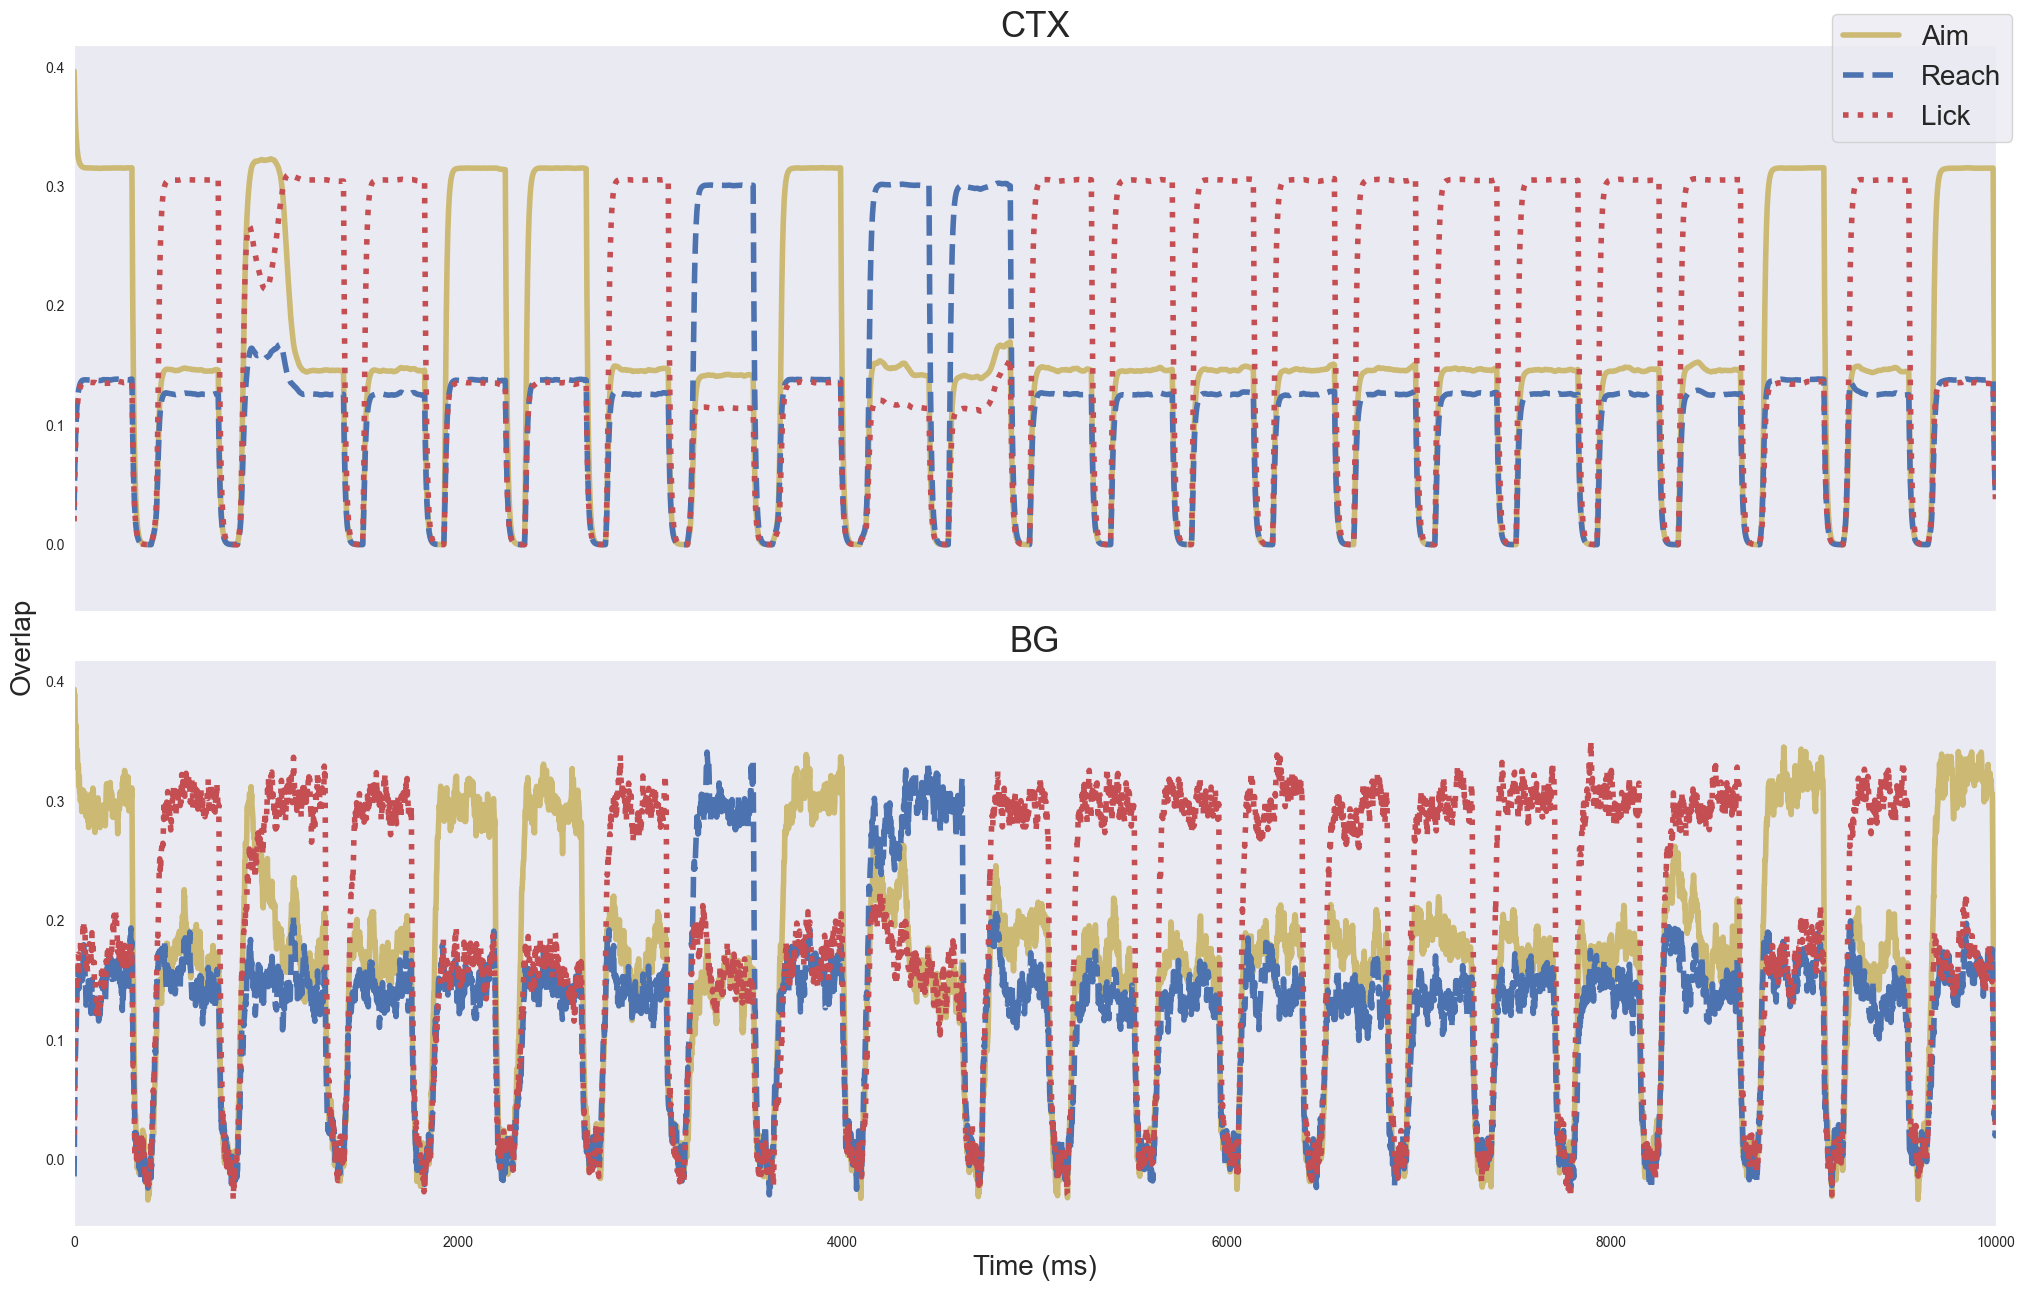

In [7]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=4, color=colors[8])
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
axes[1].plot(overlaps_bg[0], linestyle='solid', linewidth=4, color=colors[8])
axes[1].plot(overlaps_bg[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[1].plot(overlaps_bg[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("BG", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 10000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.show()
